## Sphere

In [ ]:
LEN = 5
A = np.zeros((LEN,LEN,LEN))

center_x = 0.5*(LEN-1)
center_y = 0.5*(LEN-1)
center_z = 0.5*(LEN-1)
Radius = 2
for xx in range(LEN):
    for yy in range(LEN):
        for zz in range(LEN):
            dist = np.sqrt((xx - center_x)**2 + (yy - center_y)**2 + (zz - center_z)**2)
            if dist <= Radius:
                A[xx, yy, zz] = 1
print(A)
print(np.sum(A))
print(center_x)
plt.imshow(A[np.int(center_x),:,:])

## Create square and circle around chosen point

In [ ]:
# start with a 100 x 100 square grid
Nside = 100
base_indices = np.arange(Nside)
x_indices, y_indices = np.meshgrid(base_indices, base_indices)
reference_position_indices = np.array([37, 20])
# disk = np.where(np.sqrt((x_indices - reference_position_indices[0])**2 + (y_indices - reference_position_indices[1])**2)<= 10, 1, 0)
np.sqrt((x_indices - reference_position_indices[0])**2 + (y_indices - reference_position_indices[1])**2)<= 10
plt.imshow(disk)

In [ ]:
square = np.where(np.logical_and(np.abs(x_indices - reference_position_indices[0]) <= 5, np.abs(y_indices - reference_position_indices[1]) <= 5), 1, 0)
plt.imshow(square)

## np.where will ravel an array with any shape to a 1D array

In [ ]:
x = np.arange(100).reshape(10,10)
print(x)
x[3:7,1:5] = np.where(x[3:7,1:5] % 2, 0, x[3:7,1:5])
print(x)

## Slicing array with a condition

In [ ]:
x = np.arange(20)
avg_1 = x[np.logical_and(7 <= x, x <= 14)].mean()
avg_2 = np.where(np.logical_and(7 <= x, x <= 14), x, 0).mean()
avg_1 == avg_2

In [ ]:
x_values = np.arange(20)
condition = np.logical_and(7 <= x_values, x_values <= 14)
x_values[condition]

## Averaging sphere

In [ ]:
test_box = np.random.rand(101,101,101)
test_center = [0.5*(np.shape(test_box)[0]-1), 0.5*(np.shape(test_box)[1]-1), 0.5*(np.shape(test_box)[2]-1)]

true_false_index_x = np.arange(np.shape(test_box)[0])
true_false_index_y = np.arange(np.shape(test_box)[1])
true_false_index_z = np.arange(np.shape(test_box)[2])
test_x, test_y, test_z = np.meshgrid(true_false_index_x, true_false_index_y, true_false_index_z)

circle_condition = np.sqrt((test_x - test_center[0])**2 + (test_y - test_center[1])**2 + (test_z - test_center[2])**2) <= 30
inside_circle_mean = np.mean(test_box[circle_condition])
test_box = np.where(circle_condition, inside_circle_mean, test_box)

plt.imshow(test_box[:,:,21])

## Light cone: Global Average Neutral Fraction vs. Redshift

In [ ]:
lightcone = p21c.run_lightcone(
    redshift = 6,
    max_redshift = 8,
    init_box=init_cond,
    lightcone_quantities=(
        'brightness_temp',
        'xH_box',
    ),
    global_quantities=(
        'brightness_temp',
        'xH_box'
    )
)

p21c.plotting.plot_global_history(lightcone, kind='xH_box')
plt.title("Neutral Freaction vs. Redshift")

## Plotting slices of Neutral fractions.

In [ ]:
def simple_xH_plot(ion: p21c.outputs.IonizedBox, ax: plt.Axes):
    return ax.imshow(ion.xH_box[:, :, 0].T, extent=(0,200,0,200), vmin=0, vmax=1, origin='lower')

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(14,6), sharex=True, sharey=True, f)

for i, z in enumerate([20, 12, 10, 9, 8, 7, 6, 5]):
    ion = p21c.ionize_box(redshift=z, init_boxes=init_cond)
    im = simple_xH_plot(ion, ax.flatten()[i])
    ax.flatten()[i].set_title(f"z = {z}, Age = {cosmo_params.cosmo.age(z):.2f}")
    
cbar = plt.colorbar(im, ax=ax.ravel().tolist())
cbar.set_label("Neutral Fraction")

## Plot slices of ionized boxes

In [ ]:
color='w'

fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=True, gridspec_kw={"hspace":0.1, 'wspace': 0.05})
for i, box in enumerate(ionized_boxes):
    im = ax.flatten()[i].imshow(box[150, :, :], extent=(0,200,0,200), vmin=0, vmax=1, origin='lower')
    ax.flatten()[i].set_title(f"EFF={HII_EFF_FACTORS[i]:.3f}", color=color)
    ax.flatten()[i].tick_params(color=color, labelcolor=color)
    
cbar = plt.colorbar(im, ax=ax.ravel().tolist())
cbar.set_label("Neutral Fraction", color=color)

## unblurred and blurred side by side comparison

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,15))

img1 = ax1.imshow(ionized[:, :, 0], extent=(0,BOX_LEN,0,BOX_LEN), origin='lower')
ax1.set_title(f"z = {z}, Age = {cosmo_params.cosmo.age(z):.2f}", fontsize=16)
ax1.set_ylabel("y [voxel]")
ax1.set_xlabel("x [voxel]")
colorbar(img1)


img2 = ax2.imshow(Sphere_Blurring(ionized, 140, 1)[:, :, 0], extent=(0,BOX_LEN,0,BOX_LEN), origin='lower')
ax2.set_title(f"Blurred, z = {z}, Age = {cosmo_params.cosmo.age(z):.2f}", fontsize=16)
ax2.set_xlabel("x [voxel]")
colorbar(img2)

plt.tight_layout(h_pad=1)

## x, y, z slices of the blurred box

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,15), dpi=200)

img1 = ax1.imshow(Sphere_blurred[0,:,:], origin='lower')
colorbar(img1)

img2 = ax2.imshow(Sphere_blurred[:,0,:], origin='lower')
colorbar(img2)

img3 = ax3.imshow(Sphere_blurred[:,:,0], origin='lower')
colorbar(img3)

plt.tight_layout(h_pad=1)

## Generator

In [ ]:
shape = (300, 100, 2740, 15, 22)
list(np.random.randint(0,side_length) for side_length in shape)
# generator = [expression for item(s) in iterable if condition]

## Calculate Average with big function broken up into smaller functions

In [ ]:
def calculate_average(box, radius, reference_position, shape='cube', weights=None):
    """
    Given an array ``box``, calculate the average over some region with radius
    ``radius`` centered on location ``reference_position``.
    """
    # define a smaller cube with sides 2*radius+1
    # condition for sphere
    # mean(box[condition_for_sphere])
    
    # retrieve the region of interest
    # region_of_interest = get_subarray(box, radius, reference_position, shape)
    # mean of region and return value
    # weights = generate_weights(region_of_interest, weights) # this is extra; don't worry for now
    # return np.average(region_of_interest, weights=weights)

## Definition of Weighted Average

In [ ]:
# weighted_average = sum(weights * array) / sum(weights)

## Plotted gaussian and compute area under the curve

In [ ]:
def Gaussian(x, sigma=1, mu=0):
    return (1/sigma/np.sqrt(2*np.pi))*(np.exp(-0.5*(((x-mu)/sigma)**2)))

import numpy as np
x = np.linspace(-1.4370396997748922,1.4370396997748922,10**3)
sigma = 1
g = Gaussian(x, sigma=sigma)
# fig = plt.figure(figsize=(15,15))
# plt.plot(x, g, [-4*sigma,-4*sigma], [-0.01, 0.2], [4*sigma,4*sigma], [-0.01, 0.2])

from scipy.integrate import simps

area = simps(g, x)
print(area)

## plotting the shells

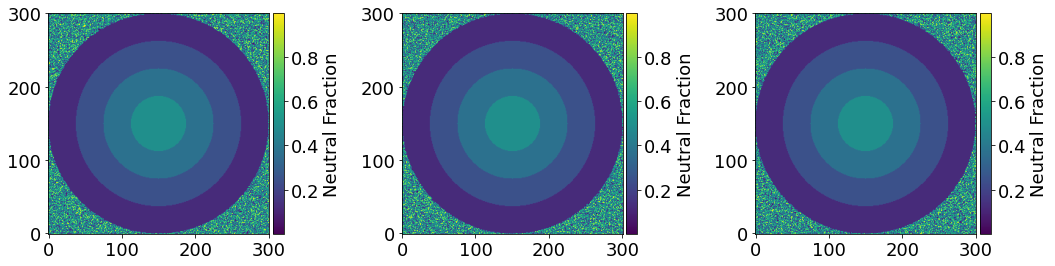

In [28]:
radius = 150
shell_box = top_hat_shell_averaging(distance_from_coordinate(radius*2+1), radius, noise_box)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,15))

img1 = ax1.imshow(shell_box[150,:,:], origin='lower')
colorbar(img1)

img2 = ax2.imshow(shell_box[:,150,:], origin='lower')
colorbar(img2)

img3 = ax3.imshow(shell_box[:,:,150], origin='lower')
colorbar(img3)

plt.tight_layout(h_pad=1)

## Average 4 spherical shells in a given box,  with diameter = sides of box, sphere centered on cube's center

In [22]:
def top_hat_shell_averaging(distance_box, radius, input_box):
    
    sphere_condition =  distance_box <= radius
        
    inside_sphere_mean = np.mean(input_box[sphere_condition])  # slicing shaped array by condition will ravel the array

    shell_condition1 =  distance_box <= 0.25*radius
    shell_condition2 =  np.logical_and(distance_box <= 0.5*radius, distance_box > 0.25*radius)
    shell_condition3 =  np.logical_and(distance_box <= 0.75*radius, distance_box > 0.5*radius)
    shell_condition4 =  np.logical_and(distance_box <= radius, distance_box > 0.75*radius)
    
    output_box = np.where(shell_condition1, inside_sphere_mean, input_box)
    output_box = np.where(shell_condition2, 0.75*inside_sphere_mean, output_box)
    output_box = np.where(shell_condition3, 0.5*inside_sphere_mean, output_box)
    output_box = np.where(shell_condition4, 0.25*inside_sphere_mean, output_box)

    return output_box

## Sphere Blurring Function

In [ ]:
def Sphere_Blurring(box, radius, iteration):
    
    box = box.copy()  # make copy of input box to have a separate box
    
    dist_frm_coord_box = distance_from_coordinate([radius*2+1]*3)

    inside_sphere_mean_data_top_hat = []  # empty list for data collection
    inside_sphere_mean_data_gaussian = []
    
    for i in range(iteration):
        
        rand_coord = random_voxel(box.shape)
                
        cube_region_indices, cube_region_box = cube_centered_about_coordinate(rand_coord, radius, box)
        
        inside_sphere_mean_top_hat, sphere_condition_box = top_hat_sphere_average_value(dist_frm_coord_box, radius, cube_region_box)

        inside_sphere_mean_gaussian, sphere_condition_box = gaussian_sphere_average_value(dist_frm_coord_box, radius, cube_region_box)
        # returning sphere_condition_box only for plotting box purposes, could be removed if plotting the box is no longer required
        
        
        
#         inside_sphere_mean_data_top_hat = np.append(inside_sphere_mean_data_top_hat, inside_sphere_mean_top_hat)
#         inside_sphere_mean_data_gaussian = np.append(inside_sphere_mean_data_gaussian, inside_sphere_mean_gaussian)
#     return np.array(inside_sphere_mean_data_top_hat), np.array(inside_sphere_mean_data_gaussian)


        cube_region_box = np.where(sphere_condition_box, inside_sphere_mean_gaussian, cube_region_box)
        box[cube_region_indices] = cube_region_box
    return box

## Cube Blurring Function

In [ ]:
def Square_Blurring(box, radius, iteration):
    box = box.copy()  # make copy of input box to have a separate box
    for i in range(iteration):
        np.random.seed()  # set seed to a randome number
        
        rand_coord = np.random.randint(radius, BOX_LEN-1-radius, size=3)  # ensure that the random center point won't be at the edge of the cube
        
        cube_region = box[rand_coord[0]-radius:rand_coord[0]+radius+1, rand_coord[1]-radius:rand_coord[1]+radius+1, rand_coord[2]-radius:rand_coord[2]+radius+1]
        
        neutral_mean = np.mean(cube_region)
        
        box[rand_coord[0]-radius:rand_coord[0]+radius+1, rand_coord[1]-radius:rand_coord[1]+radius+1, rand_coord[2]-radius:rand_coord[2]+radius+1] = neutral_mean
    return box

## Computing the sphere radius to gaussian radius ratio

In [ ]:
from scipy.integrate import simps
from IPython.display import clear_output
import numpy as np

In [ ]:
R_g = 1.44  # place holder, guessed answer
error = 1  # place holder
while error > 10**-8:
    r = np.linspace(0, R_g, 10**8)  # array of equally spaced numbers between 0 and R_g
    g = np.exp(-r**2)*r**2
    area = simps(g,r)  # intergral of e^-r^2 * r^2 from r=0 to r=R_g
    error = np.abs(1/3-area)  # we equate the integral to 1/3
    R_g += 10**-8  # increase our guess of R_g by 10^-8 & intergrate again if error doesn't meet threshold. 
    clear_output(wait=True)
#     print(R_g)
    print(f'R_g = {R_g:.16f}, integral = {area:.16f}, error = {error:.16e}')

In [ ]:
from scipy.integrate import simps
import numpy as np

R_g = 1.4370396997748922  # place holder, guessed answer
error = 1  # place holder
while error > 10**-8:  # keep increasing R_g by 10^-8 while the error is below a set threshold
    r = np.linspace(0, R_g, 10**8)  # array of equally spaced numbers between 0 and R_g
    g = np.exp(-r**2)*r**2  # integrand
    area = simps(g,r)  # integral of e^-r^2 * r^2 from r=0 to r=R_g using Simpson's rule
    error = np.abs(1/3-area)  # equate the integral to 1/3, compute the error
    R_g += 10**-8  # increase our guess of R_g by 10^-8 & integrate again if error doesn't meet threshold. 
print(f'R_g = {R_g}, integral = {area}, error = {error}')  # print relevant quantities of interest.

In [ ]:
print(f'R_g = {R_g},\nintegral = {area},\nerror = {error}')

In [ ]:
1.4370396997748922 - 1.4370397097748921

## Tuning the radius ratios of the 3 different methods

In [ ]:
var_Gaussian = np.var(gaussian)
var_sphere = np.var(sphere)
var_cube = np.var(cube)

print(var_Gaussian)
print(var_sphere)
print(var_cube)

print(abs((var_Gaussian-var_sphere)/np.mean([var_Gaussian, var_sphere])))
print(abs((var_Gaussian-var_cube)/np.mean([var_Gaussian, var_cube])))
print(abs((var_cube-var_sphere)/np.mean([var_cube, var_sphere])))

## Plotting function single plot condition

In [ ]:
fs = (gaussian1, gaussian2, [1,1,1])
fs2 = np.array(np.array([gaussian1]))
type(fs)
type(fs) is tuple
type(fs2) is tuple

## Making list of titles

In [ ]:
titles = []
for radius in radii:
    titles = np.append(titles, f'Radius = {radius}')
    
print(titles)

## Reshaping 1D array

In [ ]:
A = np.arange(1, 4)
B = np.arange(4, 7)
C = np.arange(7, 10)
print(A, B, C)
D = []
for a in A:
    for b in B:
        for c in C:
            D = np.append(D, f'{a, b, c}')
pritnt(D)
D = D.reshape(len(A), len(B), len(C))
D[:,0,:]

## Print current time

In [ ]:
import time
# time.ctime() # 'Mon Oct 18 13:35:29 2010'
time.strftime('%l:%M%p %Z on %b %d, %Y') # ' 1:36PM EDT on Oct 18, 2010'
# time.strftime('%l:%M%p %z on %b %d, %Y') # ' 1:36PM EST on Oct 18, 2010'

In [ ]:
import numpy as np
1-np.exp(-1)

## colorbar function

In [27]:
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax, label="Neutral Fraction")
    plt.sca(last_axes)
    return cbar

## Creating Noise Box

In [21]:
import numpy as np
np.random.seed()
# np.random.seed(5) ; np.random.rand(10)
noise_box = np.random.rand(301, 301, 301)

## Creating plots of standard deviation of average neutral fraction distributions as a function of shell numbers and radii.

In [ ]:
def generate_distribution_standard_deviations():

    iterations = 3*10**2
    radii = np.arange(10, 100, 10)  # [10, 20, 30, ... 90]
    sigma_factors = np.arange(1, 6)  # [1, 2, 3, 4, 5]
    shell_numbers = np.arange(1, 9)  # [1, 2, 3, 4, 5, 6, 7, 8]
    stand_devs_gaussian = []  # empty list for data collection
    stand_devs_sphere = []
    stand_devs_cube = []

    for radius in radii:

        sphere = Average_Neutral_Fraction_Distribution(
                box=noise_box,
                radius=radius,
                iteration=iterations,
                blur_shape='top_hat_sphere'
            )

        cube = Average_Neutral_Fraction_Distribution(
                box=noise_box,
                radius=radius,
                iteration=iterations,
                blur_shape='top_hat_cube'
            )

        stand_dev_sphere = np.std(sphere)
        stand_dev_cube = np.std(cube)

        for shell_num in shell_numbers:

            stand_devs_sphere = np.append(stand_devs_sphere, stand_dev_sphere)
            stand_devs_cube = np.append(stand_devs_cube, stand_dev_cube)

            for sigma_factor in sigma_factors:

                gaussian = Average_Neutral_Fraction_Distribution(
                    box=noise_box,
                    radius=radius,
                    sigma_factor=sigma_factor,
                    iteration=iterations,
                    shell_num=shell_num,
                    blur_shape='Gaussian_sphere'
                )

                stand_dev_gaussian = np.std(gaussian)

                stand_devs_gaussian = np.append(stand_devs_gaussian, stand_dev_gaussian)

        print(f'progress = {int(round(radius*10/len(radii)))}%')

    stand_devs_gaussian = stand_devs_gaussian.reshape(len(radii), len(shell_numbers), len(sigma_factors))
    stand_devs_sphere = stand_devs_sphere.reshape(len(radii), len(shell_numbers))
    stand_devs_cube = stand_devs_cube.reshape(len(radii), len(shell_numbers))
    
    return stand_devs_gaussian, stand_devs_sphere, stand_devs_cube

## Plotting Standard Deviations

In [ ]:
stand_devs_gaussian, stand_devs_sphere, stand_devs_cube = generate_distribution_standard_deviations()


titles = []
for radius in radii:
    titles = np.append(titles, f'Radius = {radius}')
    
plots(
    x_vals=shell_numbers, 
    y1s=tuple(stand_devs_gaussian[:,:,0]),
    y2s=tuple(stand_devs_gaussian[:,:,1]),
    y3s=tuple(stand_devs_gaussian[:,:,2]),
    y4s=tuple(stand_devs_gaussian[:,:,3]),
    y5s=tuple(stand_devs_gaussian[:,:,4]),
    y6s=tuple(stand_devs_sphere), 
    y7s=tuple(stand_devs_cube),
    y1s_label='Gaus 1σ',
    y2s_label='Gaus 2σ',
    y3s_label='Gaus 3σ',
    y4s_label='Gaus 4σ',
    y5s_label='Gaus 5σ',
    y6s_label='Sphere', 
    y7s_label='Cube',
    shared_y_label='Standard Deviation', 
    shared_x_label='Number of Weighted Bins / Spherical Shells', 
    figure_shape=(3,3), 
    figure_size=(18,18), 
    title=titles, 
    shared_title=f'Standard Deviation of Average Neutral Fraction Distribution\
    (Radius Ratio 2, Random Unseeded Voxels, iterations = {iterations})',
    vertical_gap=0.1,
    horizontal_gap=0.2,
    y_notation='sci',
    share_y_axis=False,
    figure_resolution=1000  # units: dpi
)

## Number of cores running

In [ ]:
import os
print(type(os.cpu_count()))

# Documentation Figures

In [24]:
def distance_from_coordinate(box_length):
        
    index = np.arange(-0.5*(box_length-1), 0.5*(box_length+1))

    x_mesh, y_mesh, z_mesh = np.meshgrid(index, index, index, indexing='ij')
    
    distance = np.sqrt((x_mesh)**2 + (y_mesh)**2 + (z_mesh)**2)
    
    return distance

In [39]:
distance_box = distance_from_coordinate(301)

# Color function with default color: white

In [1]:
def colorbar(mappable, plot_color='white', color_bar_label='Neutral Fraction'):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.ylabel(color_bar_label, color=plot_color)
    plt.tick_params(color=plot_color, labelcolor=plot_color)
    plt.sca(last_axes)
    
    ax.tick_params(color=plot_color, labelcolor=plot_color)
    
    for spine in ax.spines.values():  # figure spine color
        spine.set_edgecolor(plot_color)
    
    return cbar

In [ ]:
color='white'

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,15))

img1 = ax1.imshow(distance_box[50,:,:], origin='lower')
colorbar(img1, color_bar_label='Distance', plot_color=color)
ax1.set_title('x = 0 plane', color=color)

img2 = ax2.imshow(distance_box[:,0,:], origin='lower')
colorbar(img2, color_bar_label='Distance', plot_color=color)
ax2.set_title('y = -50 plane', color=color)

img3 = ax3.imshow(distance_box[:,:,100], origin='lower')
colorbar(img3, color_bar_label='Distance', plot_color=color)
ax3.set_title('z = 50 plane', color=color)

plt.tight_layout(h_pad=1)

In [ ]:
def cube_centered_about_coordinate(coordinate_array, radius, box):
    box = box.copy()
    
    x_ind1 = int(coordinate_array[0]-radius)  # x-domian
    x_ind2 = int(coordinate_array[0]+radius+1)  # ending index is not inclusive
    y_ind1 = int(coordinate_array[1]-radius)  # y-domain
    y_ind2 = int(coordinate_array[1]+radius+1)
    z_ind1 = int(coordinate_array[2]-radius)  # z-domain
    z_ind2 = int(coordinate_array[2]+radius+1)
        
    if x_ind1 < 0:  # periodic boundary conditions
        x_inds = np.r_[(x_ind1+len(box)):len(box), 0:x_ind2]
    elif x_ind2 > len(box):
        x_inds = np.r_[x_ind1:len(box), 0:(x_ind2-len(box))]
    else:
        x_inds = np.r_[x_ind1:x_ind2]

    if y_ind1 < 0:
        y_inds = np.r_[(y_ind1+len(box)):len(box), 0:y_ind2]
    elif y_ind2 > len(box):
        y_inds = np.r_[y_ind1:len(box), 0:(y_ind2-len(box))]
    else:
        y_inds = np.r_[y_ind1:y_ind2]

    if z_ind1 < 0:
        z_inds = np.r_[(z_ind1+len(box)):len(box), 0:z_ind2]
    elif z_ind2 > len(box):
        z_inds = np.r_[z_ind1:len(box), 0:(z_ind2-len(box))]
    else:
        z_inds = np.r_[z_ind1:z_ind2]
            
    indices = np.ix_(x_inds, y_inds, z_inds)
        
    try:
        output_box = box[indices]
        mean = np.mean(output_box)
        box[indices] = mean
    except IndexError:
        print(f'coordinate array = {coordinate_array}')
        print(f'radius = {radius}')
        print(f'box length = {len(box)}')
        print(f'x_ind1 = {x_ind1}')
        print(f'x_ind2 = {x_ind2}')
        print(f'x_inds = {x_inds}')
        print(f'x_ind1 = {y_ind1}')
        print(f'x_ind2 = {y_ind2}')
        print(f'y_inds = {y_inds}')
        print(f'x_ind1 = {z_ind1}')
        print(f'x_ind2 = {z_ind2}')
        print(f'z_inds = {z_inds}')
        
    return box

In [ ]:
periodicBCs_box = cube_centered_about_coordinate([0, 300, 50], 100, noise_box)

In [ ]:
color='k'

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,15))

img1 = ax1.imshow(periodicBCs_box[0,:,:], origin='lower')
colorbar(img1, color_bar_label='Abitrary', plot_color=color)
ax1.set_title('x = 0 plane', color=color)

img2 = ax2.imshow(periodicBCs_box[:,300,:], origin='lower')
colorbar(img2, color_bar_label='Abitrary', plot_color=color)
ax2.set_title('y = 300 plane', color=color)

img3 = ax3.imshow(periodicBCs_box[:,:,50], origin='lower')
colorbar(img3, color_bar_label='Abitrary', plot_color=color)
ax3.set_title('z = 50 plane', color=color)

plt.tight_layout(h_pad=1)

In [40]:
def Gaussian(x, sigma):  # μ=0, σ=1/sqrt(2), π=1
    Gaussian = np.exp(-(x/sigma)**2)
    return Gaussian

In [41]:
def gaussian_sphere_average(distance_box, radius, input_box, shell_num, sigma_factor):
    
    mean = []

    shell_radius_edges = np.linspace(0,1,shell_num+1)
    # sigma_factor number of sigmas the weighting goes out to, sigma = radius

    
    
# ======================================================================================================================
    # Radius Ratio 1
#     shell_center = 0.5*(shell_radius_edges[1:] + shell_radius_edges[:-1])*sigma_factor 
#     weight = Gaussian(x=shell_center, sigma=1)
    
    # Radius Ratio 2
    shell_center = 0.5*(shell_radius_edges[1:] + shell_radius_edges[:-1])*sigma_factor*radius
    weights = Gaussian(x=shell_center, sigma=radius)
# ======================================================================================================================


    output_box = input_box.copy()

    for ii, weight in enumerate(weights):
        condition = np.logical_and(
            distance_box <= shell_radius_edges[ii+1]*radius, 
            distance_box > shell_radius_edges[ii]*radius
        )
        inside_shell_mean = np.mean(input_box[condition])
#         mean = np.append(mean, inside_shell_mean)
        output_box = np.where(condition, weight*inside_shell_mean, output_box)
        
        
#     Gaussian_mean = np.average(mean, weights=weight)
    
    return output_box

In [46]:
shells_box = gaussian_sphere_average(distance_box=distance_box, radius=150, input_box=noise_box, shell_num=1, sigma_factor=2)

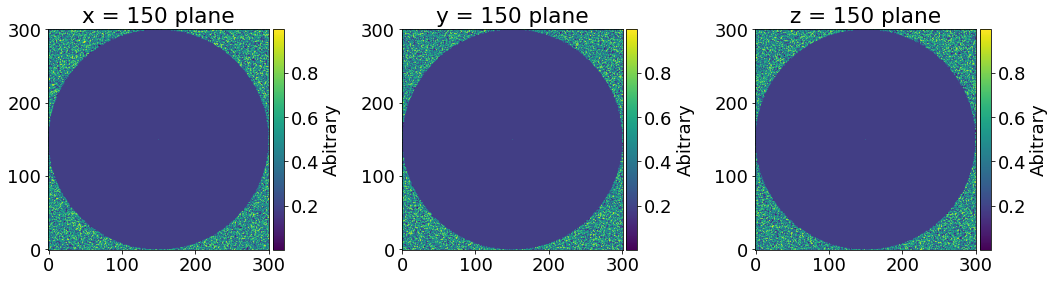

In [49]:
color='k'

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,15))

img1 = ax1.imshow(shells_box[150,:,:], origin='lower')
colorbar(img1, color_bar_label='Abitrary', plot_color=color)
ax1.set_title('x = 150 plane', color=color)

img2 = ax2.imshow(shells_box[:,150,:], origin='lower')
colorbar(img2, color_bar_label='Abitrary', plot_color=color)
ax2.set_title('y = 150 plane', color=color)

img3 = ax3.imshow(shells_box[:,:,150], origin='lower')
colorbar(img3, color_bar_label='Abitrary', plot_color=color)
ax3.set_title('z = 150 plane', color=color)

plt.tight_layout(h_pad=1)

In [ ]:
import numpy as np
radii = np.arange(1, 11)
current_time = datetime.now()
for i in range(len(radii)):
    
    time.sleep(i+1)
    previous_time = current_time
    current_time = datetime.now()
    loop_time = current_time - previous_time
    print(f'progress = {int(round((i+1)*100/len(radii)))}%\
, local time = {current_time}, loop executed in ={loop_time}')

In [ ]:
%%timeit
datetime.now()

In [ ]:
%%timeit
time.strftime('%l:%M%p %Z on %b %d, %Y') # ' 1:36PM EDT on Oct 18, 2010'

In [ ]:
%%timeit
time.ctime() # 'Mon Oct 18 13:35:29 2010'

In [ ]:
%%timeit
time.strftime('%l:%M%p %z on %b %d, %Y') # ' 1:36PM EST on Oct 18, 2010'

In [ ]:
datetime.now?

In [ ]:
from datetime import datetime, date

In [ ]:
%%timeit
start = datetime.now().time()
time.sleep(3)
end = datetime.now().time()
datetime.combine(date.min, end) - datetime.combine(date.min, start)

In [ ]:
from datetime import timedelta

In [ ]:
%%timeit

start = datetime.now().time()
time.sleep(3)
end = datetime.now().time()

t1 = timedelta(hours=start.hour, minutes=start.minute, seconds=start.second)
t2 = timedelta(hours=end.hour, minutes=end.minute, seconds=end.second)

duration = t2 - t1

In [ ]:
BOX_LEN=300
HII_DIM=450
print(np.array([int(round(radius*((4/3/np.sqrt(np.pi))**(1/3))*13/4)) for radius in np.arange(51, 3, -3)]))  # 13/4 --> speculated correction factor
print(np.arange(51, 3, -3)*BOX_LEN/HII_DIM)
BOX_LEN/HII_DIM

## Set logger to log caching activity


In [ ]:
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

## Version of 21cmFAST

In [ ]:
print(f"Using 21cmFAST version {p21c.__version__}")

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c
# import caffeine
from datetime import datetime
import time
import logging, sys, os
import tools21cm as t2c

## Number of cores running

In [3]:
print(f'Number of threads running = {os.cpu_count()}')

Number of threads running = 16


## Reset cache location 

In [4]:
p21c.config['direc'] = '/lustre/aoc/projects/hera/wchin/21cmFAST-cache'

# MFP Method

In [5]:
cosmo_params = p21c.CosmoParams()

In [6]:
BOX_LEN=301
HII_DIM=301

user_params = p21c.UserParams(
    BOX_LEN=BOX_LEN,  # Box length in Mpc
    DIM=4*HII_DIM,      # Number of Voxels for hight resolution 
    HII_DIM=HII_DIM,  # Number of Voxels for low resolution 
    N_THREADS=os.cpu_count()
)

In [7]:
start_time = datetime.now()
print(f'Excution qued at {start_time}')

init_cond = p21c.initial_conditions(
    cosmo_params=cosmo_params,
    user_params=user_params,
)

end_time = datetime.now()
execution_time = end_time - start_time
print(f'Execution completed at {end_time}')
print(f'Execution time = {execution_time}')

Excution qued at 2020-07-29 09:53:40.491829
Execution completed at 2020-07-29 09:56:50.261014
Execution time = 0:03:09.769185


In [16]:
# redshifts = np.arange(8.5, 4, -0.5)

    # temporary
# ====================================================================================================================
redshifts = np.array([6.5])
# ====================================================================================================================

ionized_boxes = np.zeros((len(redshifts), HII_DIM, HII_DIM, HII_DIM))

for i, z in enumerate(redshifts):
    ionized_box = p21c.ionize_box(redshift=z, init_boxes=init_cond).xH_box
    ionized_boxes[i] = ionized_box

In [17]:
r_mfpFalse, dn_mfpFalse = t2c.mfp(ionized_box[0], boxsize=BOX_LEN)

MFP method applied on 2D data (ver 1.0)
Completed: 100.0%
Program runtime: 0.481053 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.


In [18]:
r_mfp_10bins, dn_mfp_10bins = t2c.mfp(ionized_box[0], boxsize=BOX_LEN, bins=int(1e5))

MFP method applied on 2D data (ver 1.0)
Completed: 100.0%
Program runtime: 0.491497 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.


In [21]:
print(r_mfpFalse.shape)
print(dn_mfpFalse.shape)
print(r_mfp_10bins.shape)
print(dn_mfp_10bins.shape)

(425,)
(425,)
(100000,)
(100000,)


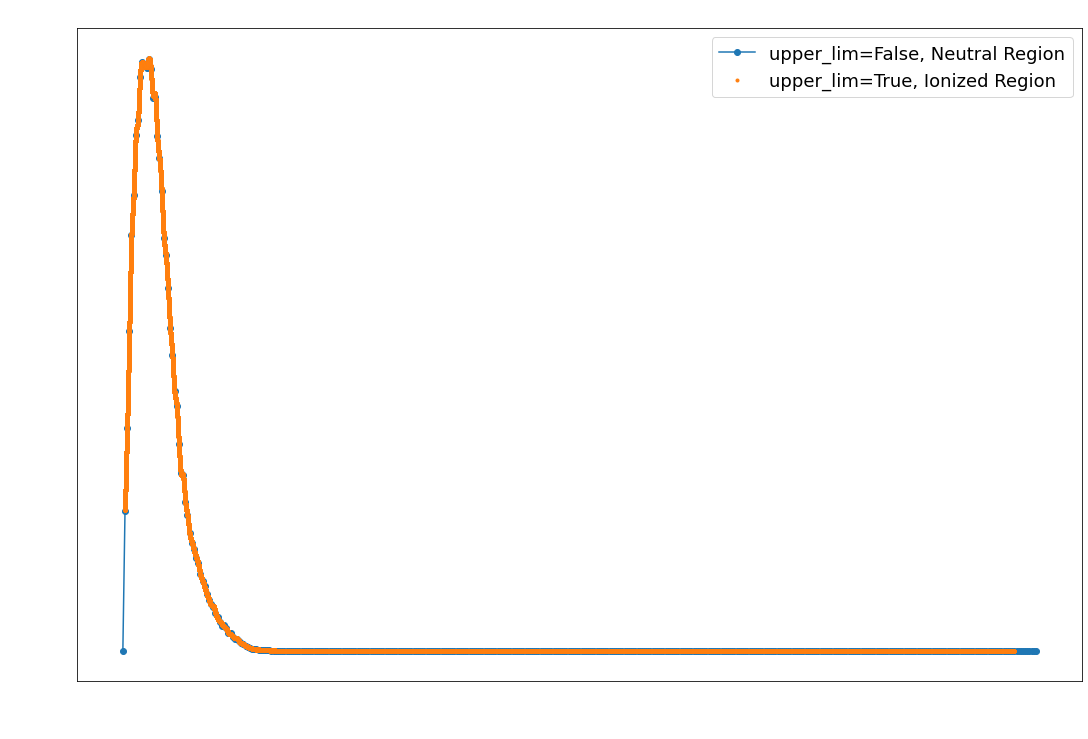

In [23]:
color = 'white'
plt.figure(figsize=(18, 12))
plt.plot(r_mfpFalse, dn_mfpFalse, '-o', label='upper_lim=False, Neutral Region')
plt.plot(r_mfp_10bins, dn_mfp_10bins, '.', label='upper_lim=True, Ionized Region')
plt.tick_params(color=color, labelcolor=color)
plt.xlabel('$R$ (Mpc)', color=color)
plt.ylabel('$R\mathrm{d}P/\mathrm{d}R$', color=color)
plt.title(f'Region Size Distribution of Neutral Fraction Box, z={redshifts[0]}', color=color)
plt.legend()
plt.rcParams['font.size'] = 18

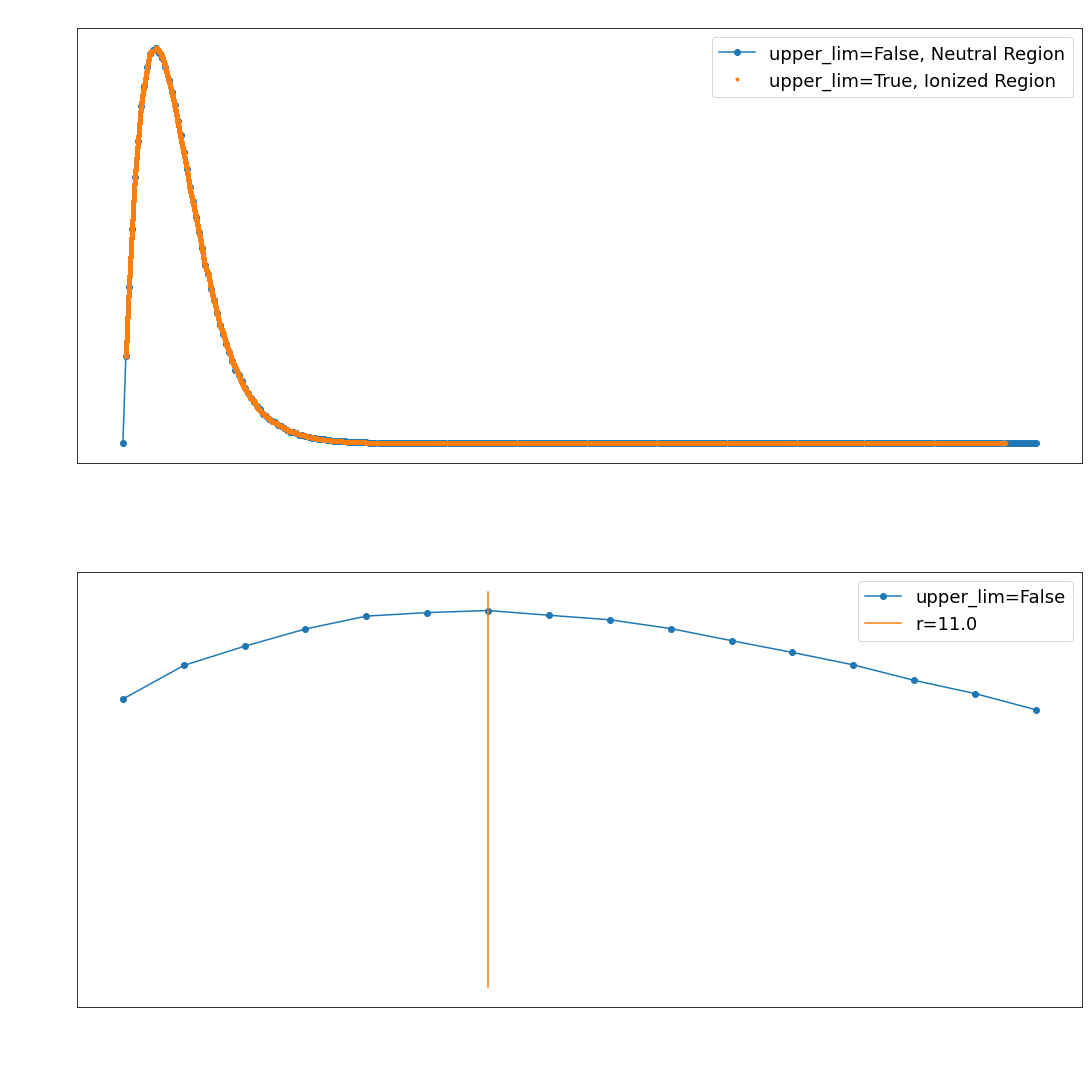

In [37]:
color = 'white'

fig, axes = plt.subplots(2, 1, figsize=(18, 18), gridspec_kw={"hspace":0.25},
)
axes.flatten()[0].plot(r_mfpFalse, dn_mfpFalse, '-o', label='upper_lim=False, Neutral Region')
axes.flatten()[0].plot(r_mfp_10bins, dn_mfp_10bins, '.', label='upper_lim=True, Ionized Region')
axes.flatten()[0].tick_params(color=color, labelcolor=color)
axes.flatten()[0].set_xlabel('$R$ (Mpc)', color=color)
axes.flatten()[0].set_ylabel('$R\mathrm{d}P/\mathrm{d}R$', color=color)
axes.flatten()[0].set_title(f'Region Size Distribution of Neutral Fraction Box, z={redshift}', color=color)
axes.flatten()[0].legend()
axes.flatten()[1].plot(r_mfpFalse[5:21], dn_mfpFalse[5:21], '-o', label='upper_lim=False')
axes.flatten()[1].plot([r_mfpFalse[np.argmax(dn_mfpFalse)]]*2, [min(dn_mfpFalse),1.05*max(dn_mfpFalse)], label=f'r={r_mfpFalse[np.argmax(dn_mfpFalse)]}')
axes.flatten()[1].tick_params(color=color, labelcolor=color)
axes.flatten()[1].set_xlabel('$R$ (Mpc)', color=color)
axes.flatten()[1].set_ylabel('$R\mathrm{d}P/\mathrm{d}R$', color=color)
axes.flatten()[1].set_title('Zoomed in on upper_lim=False', color=color)
axes.flatten()[1].legend()
plt.rcParams['font.size'] = 18

In [ ]:
plt.plot(r_mfpIon, dn_mfpIon-dn_mfp)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)


In [ ]:
r_spa, dn_spa = t2c.spa(xHII, boxsize=BOX_LEN, nscales=100)


In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(r_spa[:50], dn_spa[:50])

plt.xlabel('$R$')
plt.ylabel('$R\mathrm{d}P/\mathrm{d}R$')

plt.show()

In [ ]:
labelled_map, volumes = t2c.fof(xHII, use_skimage=True)
fof_dist = t2c.plot_fof_sizes(volumes, bins=30, boxsize=BOX_LEN)

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.step(fof_dist[0], fof_dist[1])
plt.xscale('log')
plt.yscale('log')
plt.ylim(fof_dist[2],1)

plt.xlabel('$V$')
plt.ylabel('$V^2\mathrm{d}P/\mathrm{d}V$')

plt.show()

In [ ]:
A = np.arange(6).reshape(2,3)
more_then_1_indeces = np.argwhere(A>1)

In [ ]:
more_then_1_indeces.shape

In [ ]:
np.random.randint(0, high=5, size=5)

In [ ]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import sys

def mfp3d(arr, xth=0.5, iterations=10000000, verbose=True):
    #3D interpolation is required
    #RegularGridInterpolator in scipy(>0.14) is used to do the interpolation

    info = arr.shape  # dimentions of the data box
    longest = max(arr.shape)  # longest axis
    num_sz  = np.zeros(longest)  # place holder with length of the longest axis

    ar  = np.zeros(arr.shape)  # place holder with data box shape
    ar[arr >= xth] = 1  # generating a binary box, xth = threshold

    loc = np.argwhere(ar == 1)  # locations of ionized cells
    rand_loc = np.random.randint(0, high=loc.shape[0], size=iterations)  # iterations number of random ionized locations
    #==================================================================================
    thetas   = np.random.randint(0, 360, size=iterations)  # should it be 0 to 180 deg?
    #==================================================================================

    phis     = np.random.randint(0, 360, size=iterations)
    ls       = np.sin(thetas*np.pi/180)*np.cos(phis*np.pi/180)  # dx
    ms       = np.sin(thetas*np.pi/180)*np.sin(phis*np.pi/180)  # dy
    ns       = np.cos(thetas*np.pi/180)  # dz
    xs,ys,zs = loc[rand_loc,0],loc[rand_loc,1],loc[rand_loc,2]  # slicing ionized locations with [randome coordinate, (x,y,z)]

    interp_func = RegularGridInterpolator((np.arange(info[0]), np.arange(info[1]), np.arange(info[2])), ar, bounds_error=False, fill_value=0)

    #==================================================================================
    for rr in range(longest):  # steping 1 step along the ray for all directions.
    # should it be sqrt(longestX^2, longestY^2, longestZ^2)?
    # motivation: no rays will be longer than the longest axis?
    #==================================================================================

        xs,ys,zs = xs+ls,ys+ms,zs+ns  # steping by dx, dy, dz
        pts    = np.vstack((xs,ys,zs)).T
        vals   = interp_func(pts)
        check  = np.argwhere(vals<=0.5)  # coordinates that are outsise ionized regions.
        num_sz[rr] = check.shape[0]  # record the number of new rays terminated in this loop
        xs,ys,zs = np.delete(xs, check),np.delete(ys, check),np.delete(zs, check)  # for the terminated rays,
        ls,ms,ns = np.delete(ls, check),np.delete(ms, check),np.delete(ns, check)  # delete the forward step 
        if verbose:
            perc = (rr+1)*100/longest
            msg  = '%.1f'%perc + '%'
            loading_verbose(msg)
        if not xs.size: break
    msg  = '100.0' + '%'
    loading_verbose(msg)
    size_px = np.arange(longest)
    return num_sz, size_px

def mfp2d(arr, xth=0.5, iterations=1000000, verbose=True):
    #2D interpolation is required
    #RegularGridInterpolator in scipy(>0.14) is used to do the interpolation

    info    = arr.shape
    longy	= max([info[0], info[1]])
    longest = int(np.sqrt(2)*longy)
    num_sz  = np.zeros(longest)

    ar  = np.zeros(arr.shape)
    ar[arr >= xth] = 1

    loc = np.argwhere(ar == 1)
    rand_loc = np.random.randint(0, high=loc.shape[0], size=iterations)
    thetas   = np.random.randint(0, 360, size=iterations)
    ls       = np.sin(thetas*np.pi/180)
    ms       = np.cos(thetas*np.pi/180)

    xs,ys    = loc[rand_loc,0],loc[rand_loc,1]

    interp_func = RegularGridInterpolator((np.arange(info[0]), np.arange(info[1])), ar, bounds_error=False, fill_value=0)

    for rr in range(longest):
        xs,ys  = xs+ls,ys+ms
        pts    = np.vstack((xs,ys)).T
        vals   = interp_func(pts)
        check  = np.argwhere(vals<=0.5)
        num_sz[rr] = check.shape[0]
        xs,ys  = np.delete(xs, check),np.delete(ys, check)
        ls,ms  = np.delete(ls, check),np.delete(ms, check)
        if verbose:
            perc = (rr+1)*100/longest
            msg  = '%.1f'%perc + '%'
            loading_verbose(msg)
        if not xs.size: break
    msg  = '100.0' + '%'
    loading_verbose(msg)
    size_px = np.arange(longest)
    return num_sz, size_px


def loading_verbose(string):
    msg = ("Completed: " + string )
    sys.stdout.write('\r'+msg)
    sys.stdout.flush()

In [ ]:
np.vstack((1,1,1)).T

In [ ]:
np.hstack((1,1,1)).T

In [ ]:
t2c.conv.LB?

In [ ]:
bins = [10,2]
np.array(bins).size

In [ ]:
r_min = 1
r_max = 100
bins = 10
10**np.linspace(np.log10(r_min), np.log10(r_max), bins)

In [ ]:
import scipy as sp

In [ ]:
def rebin_bsd(rr, pp, bins=10, r_min=None, r_max=None):
    fp = sp.interpolate.interp1d(rr, pp, kind='linear')
    if np.array(bins).size == 1:
        if r_min is None: r_min = rr.min()+1
        if r_max is None: r_max = rr.max()-10
        rs = 10**np.linspace(np.log10(r_min), np.log10(r_max), bins)
    else: rs = np.array(bins)
    return rs, fp(rs)

In [ ]:
x = np.linspace(-1, 1, 10**3)
noise = (np.random.rand(len(x))-0.5)
f = np.exp(-x)

In [ ]:
x_log, f_log = rebin_bsd(x, f, bins=int(len(x)*1), r_min = np.min(x), r_max = np.max(x))

In [ ]:
f1 = sp.interpolate.interp1d(x, f, kind='cubic')

x_new = np.linspace(0, 1, 500)
f1s = f1(x_new)

In [ ]:
plt.figure(figsize=(11,6))
plt.semilogy(x, f, '.', label='signal + noise', alpha=0.5)
plt.semilogy(x_log, f_log, '.', label='log scale grid')
# plt.plot(x_new, f1s, '-', label='interpolate')
# plt.plot(x[1:-10:], f[1:-10:]-noise[1:-10:], 'k', label='signal')
plt.legend()

In [ ]:
plt.figure(figsize=(11, 6))
plt.plot(x, x_log)

In [ ]:
np.allclose(f, f1s)

In [ ]:
x = np.linspace(-10, 10, 10**3+1)
noise = (np.random.rand(len(x))-0.5)*10**-1
gaussian = np.exp(-(x/0.5)**2)
noisy_gaussian = np.exp(-(x/0.5)**2) + noise
Re_FFT = 0.03*np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(noisy_gaussian))))
Re_FFT_split = 0.03*(np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(gaussian)))) + np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(noise)))))
Im_FFT = 0.1*np.imag(np.fft.fftshift(np.fft.fft(np.fft.fftshift(noisy_gaussian))))

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(x, noisy_gaussian, label='noisy gaussian')
plt.plot(x, Re_FFT, label='Re{FFT(noisy gaussian)}')
# plt.plot(x, Re_FFT_split, '--', label='Re{FFT(gaussian) + FFT(noise)}')
# plt.plot(x, Im_FFT, label='Im{FFT(noisy gaussian)}')
plt.legend()
plt.tick_params(labelcolor='white', color='white')

In [ ]:
from scipy.interpolate import interp1d
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [ ]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
from matplotlib import cm
# 2-d tests - setup scattered data
x = np.random.rand(100)*4.0-2.0
y = np.random.rand(100)*4.0-2.0
z = x*np.exp(-x**2-y**2)
edges = np.linspace(-2.0, 2.0, 101)
centers = edges[:-1] + np.diff(edges[:2])[0] / 2.
XI, YI = np.meshgrid(centers, centers)
# use RBF
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)
# plot the result
plt.subplot(1, 1, 1)
X_edges, Y_edges = np.meshgrid(edges, edges)
lims = dict(cmap='RdBu_r', vmin=-0.4, vmax=0.4)
plt.pcolormesh(X_edges, Y_edges, ZI, shading='flat', **lims)
plt.scatter(x, y, 100, z, edgecolor='w', lw=0.1, **lims)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()

In [ ]:
import epcv

In [ ]:
epcv.getcv?

In [ ]:
epcv.getcv(30,100,9,1)

In [ ]:
import numpy as np

In [ ]:
A = np.array([[1,1,1], [2,2,2], [3,3,3], [4,4,4]])
A[0,:]

## Check timing of np.append vs. np.zeros and indexing & assigning

In [ ]:
%%timeit
A = []
for i in range(10):
    for ii in range(10):
        A = np.append(A, np.ones(10**4))
A = A.reshape(10, 10, 10**4)

In [ ]:
%%timeit
B = np.zeros((10, 10, 10**4))
for i in range(10):
    for ii in range(10):
        B[i, ii, :] = np.ones(10**4)

In [ ]:
(A==B).all()

In [ ]:
12*3600/40

## Light cones for Total Average Neutral Fraction vs. redshift plot

In [ ]:
lightcone = p21c.run_lightcone(
    redshift = 3,
    max_redshift = 10,
    init_box=init_cond,
    lightcone_quantities=(
        'brightness_temp',
        'xH_box'
    ),
    global_quantities=(
        'brightness_temp',
        'xH_box'
    )
)

## Plotting Total Average Neutral Fraction vs. redshift

In [ ]:
fig, ax = p21c.plotting.plot_global_history(lightcone, kind='xH_box')
ax.set_title("Box Total Neutral Fraction vs. Redshift (wider domian)", color='white')
ax.set_ylabel('Box Total Neutral Fraction', color='white')
ax.set_xlabel('Redshift, z', color='white')
ax.tick_params(axis='both', color='white', labelcolor='white')
ax.grid()

for spine in ax.spines.values():  # figure color
    spine.set_edgecolor('white')

## Generate Average Neutral Fraction Distributions as a function of blurring methods, shell numbers and σ max

In [ ]:
def generate_distributions(
    box = ionized,
    radii = np.arange(8, 17, 1),
    iterations=10**2,
    sigma_factors=[4],
    shell_numbers=[6]
):

    gaussians = []
    spheres = []
    cubes =[]
    
    start_time = datetime.now()
    current_time = start_time

    for i, radius in enumerate(radii):

        sphere = Average_Neutral_Fraction_Distribution(
                box=box,
                radius=radius,
                iteration=iterations,
                blur_shape='top_hat_sphere'
        )

        cube = Average_Neutral_Fraction_Distribution(
                box=box,
                radius=radius,
                iteration=iterations,
                blur_shape='top_hat_cube'
        )
        
        spheres = np.append(spheres, sphere)
        cubes = np.append(cubes, cube)
        
        
#         #-------------temporary-------------#
        
#         shell_numbers = [int(radius/3), int(2*radius/3)]
#         print(shell_numbers)
        
#         #-------------temporary-------------#

        
        for ii, sigma_factor in enumerate(sigma_factors):
            gaussian = Average_Neutral_Fraction_Distribution(
                box=box,
                radius=radius,
                iteration=iterations,
                sigma_factor=sigma_factor,
                shell_num=shell_numbers[ii],
                blur_shape='Gaussian_sphere'
            )

            gaussians = np.append(gaussians, gaussian)


        # print progress and local time
        previous_time = current_time
        current_time = datetime.now()
        loop_time = current_time - previous_time
        elapsed_time = current_time - start_time
        print(f'progress = {int(round((i+1)*100/len(radii)))}%, localtime =\
 {current_time}, loopexecuted in {loop_time}, elapsedtime = {elapsed_time}')

    gaussians = gaussians.reshape(len(radii), len(sigma_factors), iterations)
    spheres = spheres.reshape(len(radii), iterations)
    cubes = cubes.reshape(len(radii), iterations)
    
    return gaussians, spheres, cubes

## Generate the distributions and storing the data in global variables

In [ ]:
current_time = datetime.now()
print(f'Progress = 0%, localtime = {current_time}')

radii = np.arange(34, 3, -2)  # array([34, 32, 30,... 6, 4]) units: voxels (51, 3, -3)
iterations = int(1.5*10**4)
sigma_factors = [4]
shell_numbers = [6]

gaussians, spheres, cubes = generate_distributions(
    radii=radii,
    iterations=iterations,
    sigma_factors=sigma_factors,
    shell_numbers=shell_numbers
)

## Creating Histogram

In [ ]:
histogram(
    y1s=tuple(cubes), 
    y2s=tuple(spheres), 
    y3s=gaussians, 
    marker_lines=['-.'],
    y1s_label='Cube',
    y2s_label='Sphere',
    y3s_label='Gauss',
    title=[f'Radius={r*BOX_LEN/HII_DIM:.0f}Mpc' for r in radii],
    shared_title=f'Distribution of Average \
Neutral Fraction (RR2, iterations={iterations:.2e}, redshift={redshift})',
    shared_y_label='Counts',
    shared_x_label='Neutral Fraction',
    figure_shape=(4,4), 
    figure_size=(18,18),
    vertical_gap=0.1,
    horizontal_gap=0.2,
    y_scale='log',
#     y_notation='sci',
    share_y_axis=False
#     dpi=1000
)

## Histogram Function

In [ ]:
def histogram(
    y1s, 
    figure_shape, 
    y2s=None,
    y3s=None,
    marker_lines=None,
    y1s_label=None,
    y2s_label=None,
    y3s_label=None,
    title=None, 
    shared_title=None,
    shared_title_x_position=0.5,   # figure coordinates, max=1 I think
    shared_title_y_position=0.92,
    shared_x_label=None, 
    shared_x_label_x_position=0.5,
    shared_x_label_y_position=0.08,
    shared_y_label=None, 
    shared_y_label_x_position=0.07,
    shared_y_label_y_postion=0.5,
    x_start=0, 
    x_stop=1, 
    bin_num=100, 
    color='white', 
    figure_size=(18,7), 
    font_size=15, 
    horizontal_gap=0.05, 
    vertical_gap=0.05, 
    y_scale='linear', 
    y_notation='plain', 
    share_x_axis=True, 
    share_y_axis=True,
    dpi=100
):  # a: x start, b: x stop
    
    bin_edges = np.linspace(x_start, x_stop, bin_num) # 100 bins from 0-1
    
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    if type(y1s) == tuple:  # hopefully more robust condition.
        
        fig, axes = plt.subplots(
            figure_shape[0], 
            figure_shape[1], 
            figsize=figure_size, 
            sharex=share_x_axis, 
            sharey=share_y_axis, 
            gridspec_kw={"hspace":vertical_gap, 'wspace':horizontal_gap},
            dpi=dpi
        )
        
        if shared_title != None:
            
            fig.suptitle(
                x=shared_title_x_position, 
                y=shared_title_y_position, 
                t=shared_title, ha='center', 
                size=1.5*font_size, 
                color=color
            )
            
        if shared_x_label != None:  # shared x label
            fig.text(
                x=shared_x_label_x_position, 
                y=shared_x_label_y_position, 
                s=shared_x_label, ha='center', 
                size=font_size, 
                color=color
            )

        if shared_y_label != None:  # shared y label
            fig.text(
                x=shared_y_label_x_position, 
                y=shared_y_label_y_postion, 
                s=shared_y_label, 
                va='center', 
                rotation='vertical', 
                size=font_size, 
                color=color
            )
        
        for i, y1 in enumerate(y1s):

            
            if y2s != None:
                axes.flatten()[i].plot(
                    bin_centers, 
                    np.histogram(y2s[i], bins=bin_edges)[0], 
                    '--', 
                    label=y2s_label
                )
                
                if iterable(y3s):
                    
                    
#                     #-------------temporary-------------#
                    
#                     shell_numbers = [int(radii[i]/3), int(radii[i]*2/3)]
                    
#                     #-------------temporary-------------#

                    
                    for ii, marker_line in enumerate(marker_lines):
                        axes.flatten()[i].plot(
                            bin_centers, 
                            np.histogram(y3s[i,ii,:], bins=bin_edges)[0], 
                            marker_line, 
                            label=f'{y3s_label} {sigma_factors[ii]}σ {shell_numbers[ii]}shell'
                        )
                    axes.flatten()[i].legend()
                    
                else:
                    axes.flatten()[i].legend()
                
            if title != None:
                axes.flatten()[i].set_title(title[i], color=color, fontsize=font_size)
                
            axes.flatten()[i].set_yscale(y_scale)
            
            if y_notation == 'sci':
                axes.flatten()[i].ticklabel_format(
                    axis='y', 
                    style=y_notation, 
                    scilimits=(0,0), 
                    useMathText=True
                )
                
            axes.flatten()[i].tick_params(
                color=color, 
                labelcolor=color, 
                labelsize=font_size, 
                size=font_size
            )  # font style

            for spine in axes.flatten()[i].spines.values():  # figure color
                spine.set_edgecolor(color)
                
    else:
        
        fig, ax = plt.subplots(figsize=figure_size)
        
        ax.plot(bin_centers, np.histogram(y1s, bins=bin_edges)[0], label=y1s_label)
        
        if y2s != None:
            ax.plot(bin_centers, np.histogram(y2s, bins=bin_edges)[0], '--', label=y2s_label)
            
            if y3s == None:
                ax.legend()
                
            else:
                ax.plot(bin_centers, np.histogram(y3s, bins=bin_edges)[0], '-.', label=y3s_label)
                ax.legend()
                
        if title != None:
            ax.set_title(title, color=color, fontsize=font_size)
            
        ax.set_yscale(y_scale)
        
        if y_notation == 'sci':
            ax.ticklabel_format(axis='y', style=y_notation, scilimits=(0,0), useMathText=True)
            
        ax.tick_params(color=color, labelcolor=color, labelsize=font_size)  # font style

        for spine in ax.spines.values():  # figure color
            spine.set_edgecolor(color)
            
    plt.show()

## Creating Ionize box

In [ ]:
redshift=6.5
ionized = p21c.ionize_box(redshift=redshift, init_boxes=init_cond).xH_box

## Plotting box x, y, z slices

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,15))

img1 = ax1.imshow(ionized[0,:,:], origin='lower')
colorbar(img1)

img2 = ax2.imshow(ionized[:,0,:], origin='lower')
colorbar(img2)

img3 = ax3.imshow(ionized[:,:,0], origin='lower')
colorbar(img3)

plt.tight_layout(h_pad=1)

## Plots

In [ ]:
def plots(
    x_vals, 
    y1s, 
    figure_shape, 
    y2s=None, 
    y3s=None, 
    y4s=None,
    y5s=None,
    y6s=None,
    y7s=None,
    y1s_label=None, 
    y2s_label=None, 
    y3s_label=None,
    y4s_label=None,
    y5s_label=None,
    y6s_label=None,
    y7s_label=None,
    title=None,
    shared_title=None,
    shared_title_x_position=0.5,   # figure coordinates, max=1 I think
    shared_title_y_position=0.92,
    shared_x_label=None, 
    shared_x_label_x_position=0.5,
    shared_x_label_y_position=0.08,
    shared_y_label=None, 
    shared_y_label_x_position=0.07,
    shared_y_label_y_postion=0.5,
    y_label=None, 
    color='white', 
    figure_size=(18,7), 
    font_size=15, 
    horizontal_gap=0.05, 
    vertical_gap=0.05, 
    y_scale='linear', 
    y_notation='plain', 
    share_x_axis=True, 
    share_y_axis=True,
    dpi=100
):  # a: x start, b: x stop
    
    if type(y1s) == tuple:  # hopefully more robust condition.
        
        fig, axes = plt.subplots(
            figure_shape[0], 
            figure_shape[1], 
            figsize=figure_size, 
            sharex=share_x_axis, 
            sharey=share_y_axis, 
            gridspec_kw={"hspace":vertical_gap, 'wspace':horizontal_gap},
            dpi=dpi
        )
        
        for i, y1 in enumerate(y1s):
            
            axes.flatten()[i].plot(
                x_vals, 
                y1, 
                label=y1s_label
            )  # plotting f
            
            if y2s != None:  # plotting g if iterable is inputted
                axes.flatten()[i].plot(
                    x_vals, 
                    y2s[i], 
                    '--', 
                    label=y2s_label
                )
                
                if y3s == None:
                    axes.flatten()[i].legend()
                    
                else:  # plotting h if iterable is inputted
                    axes.flatten()[i].plot(
                        x_vals, 
                        y3s[i], 
                        '-.', 
                        label=y3s_label
                    )
                    
                    if y4s == None:
                        axes.flatten()[i].legend()
                        
                    else:
                        axes.flatten()[i].plot(
                            x_vals, 
                            y4s[i], 
                            ':', 
                            label=y4s_label
                        )
                        
                        if y5s == None:
                            axes.flatten()[i].legend()
                            
                        else:
                            axes.flatten()[i].plot(
                                x_vals, 
                                y5s[i], 
                                '-o', 
                                label=y5s_label
                            )
                            
                            if y6s == None:
                                axes.flatten()[i].legend()
                            
                            else:
                                axes.flatten()[i].plot(
                                    x_vals, 
                                    y6s[i], 
                                    '--', 
                                    label=y6s_label, 
                                    linewidth=4
                                )
                                
                                if y7s == None:
                                    axes.flatten()[i].legend()
                            
                                else:
                                    axes.flatten()[i].plot(
                                        x_vals, 
                                        y7s[i], 
                                        '-.', 
                                        label=y7s_label, 
                                        linewidth=4
                                    )
                                    axes.flatten()[i].legend()
            
            if title != None:  # title if inputted
                axes.flatten()[i].set_title(title[i], color=color, fontsize=font_size)
            
            if y_label != None:  # y label if inputted
                axes.flatten()[i].set_ylabel(y_label[i], color=color, fontsize=font_size)
                
            if shared_title != None:
                fig.suptitle(
                    x=shared_title_x_position, 
                    y=shared_title_y_position, 
                    t=shared_title, ha='center', 
                    size=1.5*font_size, 
                    color=color
                )
                
            if shared_x_label != None:  # shared x label
                fig.text(
                    x=shared_x_label_x_position, 
                    y=shared_x_label_y_position, 
                    s=shared_x_label, ha='center', 
                    size=font_size, 
                    color=color
                )
            
            if shared_y_label != None:  # shared y label
                fig.text(
                    x=shared_y_label_x_position, 
                    y=shared_y_label_y_postion, 
                    s=shared_y_label, 
                    va='center', 
                    rotation='vertical', 
                    size=font_size, 
                    color=color
                )
            
            axes.flatten()[i].set_yscale(y_scale)  # y axis linear or log scale
            
            if y_notation == 'sci':  # plain or scientific notation
                axes.flatten()[i].ticklabel_format(
                    axis='y', 
                    style=y_notation, 
                    scilimits=(0,0), 
                    useMathText=True
                )
            
            axes.flatten()[i].tick_params(
                color=color, 
                labelcolor=color, 
                labelsize=font_size, 
                size=font_size
            )  # font style
            
            for spine in axes.flatten()[i].spines.values():  # figure spine color
                spine.set_edgecolor(color)

    else:
        
        fig, ax = plt.subplots(figsize=figure_size)  # creating subplots
        
        ax.plot(x_vals, y1s, label=y1s_label)  # plotting f
        
        if y2s != None:  # plotting g if inputted
            ax.plot(
                x_vals, 
                y2s, 
                '--', 
                label=y2s_label
            )
            
            if y3s == None:
                ax.legend()

            else:  # plotting h if iterable is inputted
                ax.plot(
                    x_vals, 
                    y3s, 
                    '-.', 
                    label=y3s_label
                )

                if y4s == None:
                    ax.legend()

                else:
                    ax.plot(
                        x_vals, 
                        y4s, 
                        ':', 
                        label=y4s_label
                    )

                    if y5s == None:
                        ax.legend()

                    else:
                        ax.plot(
                            x_vals, 
                            y5s, 
                            '-o', 
                            label=y5s_label
                        )

                        if y6s == None:
                            ax.legend()

                        else:
                            ax.plot(
                                x_vals, 
                                y6s, 
                                '-*', 
                                label=y6s_label
                            )

                            if y7s == None:
                                ax.legend()

                            else:
                                ax.plot(
                                    x_vals, 
                                    y7s, 
                                    '-x', 
                                    label=y7s_label
                                )
                                ax.legend()
            
        if title != None:  # title if inputed
            ax.set_title(title, color=color, fontsize=font_size)
            
        if y_label != None:  # y label  if inputed
            ax.set_ylabel(y_label, color=color, fontsize=font_size)
            
        ax.set_yscale(y_scale)  # linear or log
        
        if y_notation == 'sci':  # plain or scientific notation
            ax.ticklabel_format(
                axis='y', 
                style=y_notation, 
                scilimits=(0,0), 
                useMathText=True
            )

        ax.tick_params(  # font style
            color=color, 
            labelcolor=color, 
            labelsize=font_size, 
            size=font_size
        )
        
        for spine in ax.spines.values():  # figure spine color
            spine.set_edgecolor(color)

## Colorbar Function

In [ ]:
def colorbar(mappable, plot_color='white'):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.ylabel('Neutral Fraction', color=plot_color)
    plt.tick_params(color=plot_color, labelcolor=plot_color)
    plt.sca(last_axes)
    
    ax.tick_params(color=plot_color, labelcolor=plot_color)
    
    for spine in ax.spines.values():  # figure spine color
        spine.set_edgecolor(plot_color)
    
    return cbar

## Set logger to log caching activity

In [4]:
import logging, os
import py21cmfast as p21c

In [10]:
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

## Version of 21cmFAST

In [9]:
print(f"Using 21cmFAST version {p21c.__version__}")

Using 21cmFAST version 3.0.0.dev5


## Number of cores running

In [8]:
print(f'Number of threads running = {os.cpu_count()}')

Number of threads running = 16


## Gaussian function

In [ ]:
def Gaussian(x, sigma):  # μ=0, σ=1/sqrt(2), π=1
    Gaussian = np.exp(-(x/sigma)**2)
    return Gaussian

## Gausssian Sphere Averaging

In [ ]:
def gaussian_sphere_average(distance_box, radius, input_box, shell_num, sigma_factor):
    
    mean = np.zeros(shell_num)

    shell_radius_edges = np.linspace(0,1,shell_num+1)
    # sigma_factor number of sigmas the weighting goes out to, sigma = radius

    
    
# ======================================================================================================================
    # Radius Ratio 1
    shell_center = 0.5*(shell_radius_edges[1:] + shell_radius_edges[:-1])*sigma_factor 
    weight = Gaussian(x=shell_center, sigma=1)
    
    # Radius Ratio 2
#     shell_center = 0.5*(shell_radius_edges[1:] + shell_radius_edges[:-1])*sigma_factor*radius
#     weight = Gaussian(x=shell_center, sigma=radius)
# ======================================================================================================================


    
    for ii in range(shell_num):
        condition = np.logical_and(
            distance_box <= shell_radius_edges[ii+1]*radius, 
            distance_box > shell_radius_edges[ii]*radius
        )
        inside_shell_mean = np.mean(input_box[condition])
        mean[ii] = inside_shell_mean
        
    Gaussian_mean = np.average(mean, weights=weight)
    
    return Gaussian_mean

In [ ]:
def random_voxel(box_length):
    
    np.random.seed()  # set seed to a randome number
    coordinate = np.random.randint(0, box_length, size=3)

    return coordinate

In [ ]:
def random_voxel2(box_length, iterations):
    
    np.random.seed()  # set seed to a randome number
    coordinate = np.random.randint(0, box_length, size=(iterations, 3))

    return coordinate

In [ ]:
iteration = 10**3

In [ ]:
%%timeit
for i in range(iteration):
    random_coord = random_voxel(301)

In [ ]:
%%timeit
random_coord2 = random_voxel2(301, iteration)

## ================================================================

In [45]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [46]:
box = np.random.rand(301)  # noise box
iterations = int(1e1)
coordinate_array = np.random.randint(0, len(box), size=(iterations, 3))  # iteration number of random coordinates
# coordinate_array = np.array([[250, 0, 0]])
radius = 10
coordinate_array.shape

(10, 3)

## Version 1

In [47]:
box1 = box.copy()

for i in range(iterations):
    
    # indices for random cube region
    x_ind_ver1_1 = int(coordinate_array[i, 0]-radius)  # x-domian
    x_ind_ver1_2 = int(coordinate_array[i, 0]+radius+1)  # ending index is not inclusive

    if x_ind_ver1_1 < 0:  # periodic boundary conditions
        x_inds_ver1 = np.r_[(x_ind_ver1_1+len(box)):len(box), 0:x_ind_ver1_2]
    elif x_ind_ver1_2 > len(box):
        x_inds_ver1 = np.r_[x_ind_ver1_1:len(box), 0:(x_ind_ver1_2-len(box))]
    else:
        x_inds_ver1 = np.r_[x_ind_ver1_1:x_ind_ver1_2]
        
    box1[x_inds_ver1] = 2

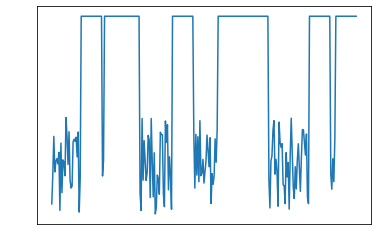

In [48]:
plt.plot(np.arange(len(box1)), box1)
plt.tick_params(color='white', labelcolor='white')

## Version 2

In [49]:
# indices of iterations number of random cube regions
x_ind_ver2_1 = (coordinate_array-radius).astype(int)
x_ind_ver2_2 = (coordinate_array+radius+1).astype(int)  # ending index is not inclusive

x_ind_ver2_1.shape

(10, 3)

In [55]:
i1 = -5
i2 = 10
A = np.arange(i1+len(box), len(box))
B = np.arange(0, i2)
C = np.concatenate((A, B))
np.ix_(C)

(array([296, 297, 298, 299, 300,   0,   1,   2,   3,   4,   5,   6,   7,
          8,   9]),)

In [56]:
np.r_[i1+len(box):len(box), 0:i2]

array([296, 297, 298, 299, 300,   0,   1,   2,   3,   4,   5,   6,   7,
         8,   9])

In [40]:
# period boundary condition
x_inds_ver2 = np.where(
    x_ind_ver2_1 < 0,  # condition1
    np.r_[(x_ind_ver2_1+len(box)):len(box), 0:x_ind_ver2_2],  # condition1 true
    np.where(  # condition1 false
        x_ind_ver2_2 > len(box),  # condition2
        np.r_[x_ind_ver2_1:len(box), 0:(x_ind_ver2_2-len(box))],  # condition2 true
        np.r_[x_ind_ver2_1:x_ind_ver2_2]  # condition2 false
    )
)

box2 = box.copy()
box2[x_inds_ver2] = 2

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
plt.plot(np.arange(len(box2)), box2)
plt.tick_params(color='white', labelcolor='white')

## ================================================================

In [28]:
progress = True
if progress:
    print(True)
else:
    print(False)

True


In [1]:
from numba import jit
import numpy as np

x = np.arange(100).reshape(10, 10)

@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def go_fast(a): # Function is compiled to machine code when called the first time
    trace = 0.0
    for i in range(a.shape[0]):   # Numba likes loops
        trace += np.tanh(a[i, i]) # Numba likes NumPy functions
    return a + trace              # Numba likes NumPy broadcasting

print(go_fast(x))

[[  9.  10.  11.  12.  13.  14.  15.  16.  17.  18.]
 [ 19.  20.  21.  22.  23.  24.  25.  26.  27.  28.]
 [ 29.  30.  31.  32.  33.  34.  35.  36.  37.  38.]
 [ 39.  40.  41.  42.  43.  44.  45.  46.  47.  48.]
 [ 49.  50.  51.  52.  53.  54.  55.  56.  57.  58.]
 [ 59.  60.  61.  62.  63.  64.  65.  66.  67.  68.]
 [ 69.  70.  71.  72.  73.  74.  75.  76.  77.  78.]
 [ 79.  80.  81.  82.  83.  84.  85.  86.  87.  88.]
 [ 89.  90.  91.  92.  93.  94.  95.  96.  97.  98.]
 [ 99. 100. 101. 102. 103. 104. 105. 106. 107. 108.]]


In [6]:
from numba import jit
import pandas as pd

x = {'a': [1, 2, 3], 'b': [20, 30, 40]}

@jit
def use_pandas(a): # Function will not benefit from Numba jit
    df = pd.DataFrame.from_dict(a) # Numba doesn't know about pd.DataFrame
    df += 1                        # Numba doesn't understand what this is
    return df.cov()                # or this!

print(use_pandas(x))

      a      b
a   1.0   10.0
b  10.0  100.0


<ipython-input-6-1a34fc432c2d>:6: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "use_pandas" failed type inference due to: non-precise type pyobject
During: typing of argument at <ipython-input-6-1a34fc432c2d> (8)

File "<ipython-input-6-1a34fc432c2d>", line 8:
def use_pandas(a): # Function will not benefit from Numba jit
    df = pd.DataFrame.from_dict(a) # Numba doesn't know about pd.DataFrame
    ^

  @jit
/lustre/aoc/projects/hera/wchin/anaconda3/envs/21cmfast/lib/python3.8/site-packages/numba/core/object_mode_passes.py:177: NumbaWarning: Function "use_pandas" was compiled in object mode without forceobj=True.

File "<ipython-input-6-1a34fc432c2d>", line 7:
@jit
def use_pandas(a): # Function will not benefit from Numba jit
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/lustre/aoc/projects/hera/wchin/anaconda3/envs/21cmfast/lib/python3.8/site-packages/numba/core/object_mode_passes.py:187: NumbaDeprecationWarning: 
Fall-back fr

In [7]:
from numba import jit
import numpy as np
import time

x = np.arange(100).reshape(10, 10)

@jit(nopython=True)
def go_fast(a): # Function is compiled and runs in machine code
    trace = 0.0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
    return a + trace

# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.time()
go_fast(x)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE
start = time.time()
go_fast(x)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

Elapsed (with compilation) = 0.21187543869018555
Elapsed (after compilation) = 6.0558319091796875e-05


In [145]:
from numba import jit, njit
import numpy as np

def gaussian_sphere_average(distance_box, radius, input_box, shell_num, sigma_factor):
    
    mean = np.zeros(shell_num)

    shell_radius_edges = np.linspace(0,1,shell_num+1)
    # sigma_factor number of sigmas the weighting goes out to, sigma = radius
    shell_center = 0.5*(shell_radius_edges[1:] + shell_radius_edges[:-1])*sigma_factor 
    weight = Gaussian(x=shell_center)
    
    for ii in range(shell_num):
        condition = np.logical_and(
            distance_box <= shell_radius_edges[ii+1]*radius, 
            distance_box > shell_radius_edges[ii]*radius
        )
        inside_shell_mean = np.mean(input_box[condition])
        mean[ii] = inside_shell_mean
        
    Gaussian_mean = np.average(mean, weights=weight)
    
    return Gaussian_mean

@jit
def gaussian_sphere_average_jit(distance_box, radius, input_box, shell_num, sigma_factor):
    
    mean = np.zeros(shell_num)

    shell_radius_edges = np.linspace(0,1,shell_num+1)
    # sigma_factor number of sigmas the weighting goes out to, sigma = radius
    shell_center = 0.5*(shell_radius_edges[1:] + shell_radius_edges[:-1])*sigma_factor 
    weight = Gaussian(x=shell_center)
    
    for ii in range(shell_num):
        condition = np.logical_and(
            distance_box <= shell_radius_edges[ii+1]*radius, 
            distance_box > shell_radius_edges[ii]*radius
        )
        inside_shell_mean = np.mean(input_box[condition])
        mean[ii] = inside_shell_mean
        
    Gaussian_mean = np.average(mean, weights=weight)
    
    return Gaussian_mean

In [96]:
noise_box = np.random.rand(301, 301, 301)

In [138]:
@jit
def distance_from_coordinate(box_length):
        
    index = np.arange(-0.5*(box_length-1), 0.5*(box_length+1))

    x_mesh, y_mesh, z_mesh = np.meshgrid(index, index, index, indexing='ij')
    
    distance = np.sqrt((x_mesh)**2 + (y_mesh)**2 + (z_mesh)**2)
    
    return distance

In [140]:
Distance_box = distance_from_coordinate(rad*2+1)

In [124]:
def random_cube_regions(box_length, number_of_coordinates, radius):
    
    np.random.seed()  # no entry: set seed to a randome number
#     np.random.seed(4)  # specifying seed for testing purposes

    coordinates = np.random.randint(0, box_length, size=(number_of_coordinates, 3))
    
    # cube indices 
    inds1 = (coordinates-radius).astype(int)
    inds2 = (coordinates+radius+1).astype(int)  # ending index is not inclusive
    

    return inds1, inds2

In [125]:
iterations = int(1e3)
rad = 50
Ind1, Ind2 = random_cube_regions(len(noise_box), iterations, rad)

In [126]:
def slicing_the_cube(ind1, ind2, radius, box):
        
    if ind1[0] < 0:  # periodic boundary conditions
        x_inds = np.r_[(ind1[0]+len(box)):len(box), 0:ind2[0]]
    elif ind2[0] > len(box):
        x_inds = np.r_[ind1[0]:len(box), 0:(ind2[0]-len(box))]
    else:
        x_inds = np.r_[ind1[0]:ind2[0]]

    if ind1[1] < 0:
        y_inds = np.r_[(ind1[1]+len(box)):len(box), 0:ind2[1]]
    elif ind2[1] > len(box):
        y_inds = np.r_[ind1[1]:len(box), 0:(ind2[1]-len(box))]
    else:
        y_inds = np.r_[ind1[1]:ind2[1]]

    if ind1[2] < 0:
        z_inds = np.r_[(ind1[2]+len(box)):len(box), 0:ind2[2]]
    elif ind2[2] > len(box):
        z_inds = np.r_[ind1[2]:len(box), 0:(ind2[2]-len(box))]
    else:
        z_inds = np.r_[ind1[2]:ind2[2]]
            
    indices = np.ix_(x_inds, y_inds, z_inds)
        
    try:
        output_box = box[indices]
        
    except IndexError:  # sample region larger than box.
        print(f'coordinate array = {ind1 + radius}')
        print(f'radius = {radius}')
        print(f'box length = {len(box)}')
        print(f'x_ind1 = {ind1[0]}')
        print(f'x_ind2 = {ind2[0]}')
        print(f'x_inds = {x_inds}')
        print(f'y_ind1 = {ind1[1]}')
        print(f'y_ind2 = {ind2[1]}')
        print(f'y_inds = {y_inds}')
        print(f'z_ind1 = {ind1[2]}')
        print(f'z_ind2 = {ind2[2]}')
        print(f'z_inds = {z_inds}')
        
    return output_box

In [130]:
sample_box = slicing_the_cube(Ind1[0], Ind2[0], rad, noise_box)

In [133]:
@njit
def Gaussian(x):  # μ=0, σ=1/sqrt(2), π=1
    Gaussian = np.exp(-x**2)
    return Gaussian

In [135]:
len(sample_box)

101

In [136]:
len(distance_box)

301

In [155]:
%%timeit
for i in range(iterations):
    A_jit = gaussian_sphere_average_jit(Distance_box, rad, sample_box, 6, 4)

10.5 s ± 305 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [154]:
%%timeit
for i in range(iterations):
    A = gaussian_sphere_average(Distance_box, rad, sample_box, 6, 4)

10.6 s ± 28.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [149]:
np.all(np.array(A) == np.array(A_jit))

True

## Generate Average Neutral Fraction Distributions as a function of redshift

In [ ]:
def generate_distributions(
    boxes=ionized_boxes,
    radii=np.arange(8, 17, 1),
    iterations=10**2,
    sigma_factor=1.4370397097748921*3,
    shell_number=6,
    progress_status=True
):

    gaussians = np.zeros((len(redshifts), len(radii), iterations))
    
    
    # temporary
# ====================================================================================================================
#     cubes = np.zeros((len(radii), iterations))
# ====================================================================================================================

    # print progress and local time
    if progress_status:
        start_time = datetime.now()
        current_time = start_time
        print(f'Progress = 0%, localtime = {start_time}')

    for i, box in enumerate(boxes):
        
    # temporary
# ====================================================================================================================
#         cube = average_neutral_fraction_distribution(
#                 box=boxes[0],
#                 radius=radius,
#                 iteration=iterations,
#                 blur_shape='top_hat_cube'
#         )
        
#         cubes[i, :] = cube
# ====================================================================================================================
        
        for ii, radius in enumerate(radii):
                        
            gaussians[i, ii, :] = average_neutral_fraction_distribution(
                box=box,
                radius=radius,
                iteration=iterations,
                sigma_factor=sigma_factor,
                shell_num=shell_number,
                blur_shape='Gaussian_sphere'
            )

        # print progress and local time
        if progress_status:
            previous_time = current_time
            current_time = datetime.now()
            loop_time = current_time - previous_time
            elapsed_time = current_time - start_time
            print(f'progress = {int(round((i+1)*100/len(boxes)))}%, \
localtime = {current_time}, loopexecuted in {loop_time}, elapsedtime = {elapsed_time}')
        
    # temporary
# ====================================================================================================================
#     return gaussians, cubes
# ====================================================================================================================
    
    return gaussians

## Creating Histogram

In [ ]:
bins = int(3e2)
histogram(
    y1s=gaussians, 
    
    # temporary
# =================================================================================================================== 
#     y2s=cubes,
# =================================================================================================================== 
    
    marker_lines=['-']*len(radii),
    y1s_labels=[f'Radius={r*BOX_LEN/HII_DIM:.0f}Mpc' for r in radii],
    bin_num=bins,
    
    # temporary
# =================================================================================================================== 
#     y2s_label='Cube',
# =================================================================================================================== 
    
    title=[f'z={redshifts[i]}, x_HI={total_neutral_fractions[i]*100:.2f}%],
    shared_title=f'Distribution of Average Neutral Fraction \
(format switch r&z, {bins} bins, {iterations:.2e} iterations)',
    shared_y_label='Counts',
    shared_x_label='Neutral Fraction',
    figure_shape=(3,3), 
    figure_size=(18,18),
    vertical_gap=0.1,
    horizontal_gap=0.2,
    y_scale='log',
#     y_notation='sci',
    share_y_axis=False,
    dpi=1000
)

In [2]:
import py21cmfast as p21c
p21c.FlagOptions?

## Converting ION_M_MIN to ION_Tvir_MIN

In [ ]:
# /* Returns the minimum source mass for ionizing sources, according to user specifications */
def get_M_min_ion(Tvir):
    
    Target_ION_M_MIN=9
    z=7
    
    ION_Tvir_MIN=10**Tvir

    # CosmoParams
    hlittle=0.6766
    OMm=0.30964144154550644
    OMb=0.04897468161869667
    OMl=1-OMm
    
    if (ION_Tvir_MIN < 9.99999e3): #// neutral IGM
        MMIN = TtoM(z, ION_Tvir_MIN, 1.22);
    else: #// ionized IGM
        MMIN = TtoM(z, ION_Tvir_MIN, 0.6);
    #// check for WDM
    if (p21c.global_params.P_CUTOFF and ( MMIN < M_J_WDM())):
        MMIN = M_J_WDM();
    return Target_ION_M_MIN - np.log10(MMIN)

# /*
#  T in K, M in Msun, mu is mean molecular weight
#  from Barkana & Loeb 2001
#  SUPRESS = 0 for no radiation field supression;
#  SUPRESS = 1 for supression (step function at z=z_ss, at v=v_zz)
#  */
def TtoM(z, T, mu):
    
    # CosmoParams
    hlittle=0.6766
    OMm=0.30964144154550644
    OMb=0.04897468161869667
    OMl=1-OMm
    
    return 7030.97 / (hlittle) * np.sqrt( omega_mz(z) / (OMm*Deltac_nonlinear(z))) * pow( T/(mu * (1+z)), 1.5 )

# /* Physical (non-linear) overdensity at virialization (relative to critical density)
#  i.e. answer is rho / rho_crit
#  In Einstein de sitter model = 178
#  (fitting formula from Bryan & Norman 1998) */
def Deltac_nonlinear(z):
    
    # CosmoParams
    hlittle=0.6766
    OMm=0.30964144154550644
    OMb=0.04897468161869667
    OMl=1-OMm
    
    d = omega_mz(z) - 1.0;
    return 18*np.pi*np.pi + 82*d - 39*d*d;

# /* Omega matter at redshift z */
def omega_mz(z):
    
    # CosmoParams
    hlittle=0.6766
    OMm=0.30964144154550644
    OMb=0.04897468161869667
    OMl=1-OMm
    
    return OMm*pow(1+z,3) / (OMm*pow(1+z,3) + OMl + p21c.global_params.OMr*pow(1+z,4) + p21c.global_params.OMk*pow(1+z, 2));

# /* returns the "effective Jeans mass" in Msun
#  corresponding to the gas analog of WDM ; eq. 10 in Barkana+ 2001 */
def M_J_WDM():
    
    # CosmoParams
    hlittle=0.6766
    OMm=0.30964144154550644
    OMb=0.04897468161869667
    OMl=1-OMm
    
    fudge=60;
    if not p21c.global_params.P_CUTOFF:
        return 0;
    z_eq = 3600*(OMm-OMb)*hlittle*hlittle/0.15;
    return fudge*3.06e8 * (1.5/p21c.global_params.g_x) * sqrt((OMm-OMb)*hlittle*hlittle/0.15) * pow(p21c.global_params.M_WDM, -4) * pow(z_eq/3000.0, 1.5);

from scipy.optimize import brentq
brentq(get_M_min_ion, 3, 6)  # intercept at 0

In [2]:
import numpy as np
from numba import jit

In [ ]:
def slicing_the_cube(ind1, ind2, box):
    """
    Selects a smaller cubical sub-region within a larger cube called 'box'.
    Incoorporates periodic boundary conditions, i.e. Pac-Man effect.
    This function takes in a set of slicing indices of one particular randomly
    selected cubical sub-region and returns the selected smaller cube.
    
    Parameters
    ----------
    ind1 : 1D ndarray, dtype: int
        The left bounds of the selected region in 1D respectively.
    ind2 : 1D ndarray, dtype: int
        The right bounds of the selected region in 1D respectively.
    box  : 3D ndarray, dtype: float32
        Data cube, when the smaller cubical
        sub-regions are being selected from.
        
    Returns
    -------
    output_box : 3D ndarray, dtype: float32
        The selected cubical smaller sub-region
        within the larger data cube.
    """
        
    if ind1[0] < 0:  # periodic boundary conditions
        # region that went beyond the zeroth voxel face of the
        # cube is replaced by the region at the 'box_length'th
        # voxel face of the cube with the same size.
        x_inds = np.r_[(ind1[0]+len(box)):len(box), 0:ind2[0]]
    elif ind2[0] > len(box):
        # region that went beyond the 'box_length'th voxel face
        # of the cube is replaced by the region at the zeroth 
        # voxel face of the cube with the same size.
        x_inds = np.r_[ind1[0]:len(box), 0:(ind2[0]-len(box))]
    else:
        # selected voxel is perfectly in the larger data cube.
        x_inds = np.r_[ind1[0]:ind2[0]]

    if ind1[1] < 0:
        y_inds = np.r_[(ind1[1]+len(box)):len(box), 0:ind2[1]]
    elif ind2[1] > len(box):
        y_inds = np.r_[ind1[1]:len(box), 0:(ind2[1]-len(box))]
    else:
        y_inds = np.r_[ind1[1]:ind2[1]]

    if ind1[2] < 0:
        z_inds = np.r_[(ind1[2]+len(box)):len(box), 0:ind2[2]]
    elif ind2[2] > len(box):
        z_inds = np.r_[ind1[2]:len(box), 0:(ind2[2]-len(box))]
    else:
        z_inds = np.r_[ind1[2]:ind2[2]]
                    
    try:
        # box[indices]
        output_box = box[np.ix_(x_inds, y_inds, z_inds)]
        
    except IndexError:  # sample region larger than box.
        print(f'ind1 = {ind1}')  # print useful info
        print(f'ind2 = {ind2}')  # for debugging
        print(f'box length = {len(box)}')
        print(f'x_ind1 = {ind1[0]}')
        print(f'x_ind2 = {ind2[0]}')
        print(f'x_inds = {x_inds}')
        print(f'y_ind1 = {ind1[1]}')
        print(f'y_ind2 = {ind2[1]}')
        print(f'y_inds = {y_inds}')
        print(f'z_ind1 = {ind1[2]}')
        print(f'z_ind2 = {ind2[2]}')
        print(f'z_inds = {z_inds}')
        
    return output_box

In [ ]:
def gaussian_sphere_average(
    distance_box, 
    radius, 
    input_box, 
    shell_num, 
    sigma_factor
):
    """
    Takes in a cube of voxels and defines 'shell_num'
    of concentric spherical shells and a core.
    A mean is taken over the voxels in each shell and the core.
    Then 'shell_num' equally spaced values are drawn as weights from 0 to 
    'sigma_factor' standard deviations of the Gaussian distribution.
    Each spherical shell and the core is assigned a weight, 
    The inner most core is weighted the most.
    The weights decrease moving outwards through the shells.
    And the outmost shell is weighted the least.
    The function then computes a weighted average over the shells and core.
    
    
    """
    
    
    mean = np.zeros(shell_num)

    shell_radius_edges = np.linspace(0,1,shell_num+1)
    # sigma_factor number of sigmas the weighting goes out to, sigma = radius
    shell_center = 0.5*(shell_radius_edges[1:] + shell_radius_edges[:-1])*sigma_factor 
    weight = Gaussian(x=shell_center)
    
    for ii in range(shell_num):
        condition = np.logical_and(
            distance_box <= shell_radius_edges[ii+1]*radius, 
            distance_box > shell_radius_edges[ii]*radius
        )
        mean[ii] = np.mean(input_box[condition])  # inside shell mean
        
    Gaussian_mean = np.average(mean, weights=weight)
    
    return Gaussian_mean

In [32]:
box = distance_from_coordinate(9)

In [33]:
import matplotlib.pyplot as plt

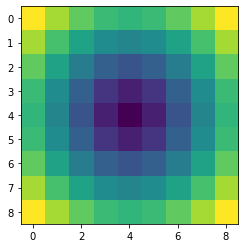

In [34]:
plt.imshow(box[5, :, :])

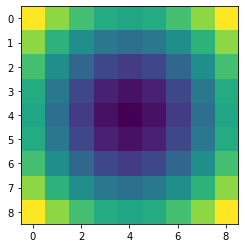

In [35]:
plt.imshow(box[1, :, :])

In [3]:
A=10
while A > 1e-10:
    A -= 0.5*A
    print(A)

5.0
2.5
1.25
0.625
0.3125
0.15625
0.078125
0.0390625
0.01953125
0.009765625
0.0048828125
0.00244140625
0.001220703125
0.0006103515625
0.00030517578125
0.000152587890625
7.62939453125e-05
3.814697265625e-05
1.9073486328125e-05
9.5367431640625e-06
4.76837158203125e-06
2.384185791015625e-06
1.1920928955078125e-06
5.960464477539062e-07
2.980232238769531e-07
1.4901161193847656e-07
7.450580596923828e-08
3.725290298461914e-08
1.862645149230957e-08
9.313225746154785e-09
4.6566128730773926e-09
2.3283064365386963e-09
1.1641532182693481e-09
5.820766091346741e-10
2.9103830456733704e-10
1.4551915228366852e-10
7.275957614183426e-11


In [ ]:
@jit
def average_neutral_fraction_distribution(
    box, 
    radius, 
    iteration, 
    shell_num=6, 
    sigma_factor=1.4370397097748921*3, 
    blur_shape=None
):
    
    box = box.copy()  # make copy of input box to have a separate box
    
    mean_data = np.zeros(iteration)  # empty list for data collection
    
    
    if blur_shape == 'Gaussian_sphere':
        
        
# ====================================================================================================================
        # Radius Ratio 1
        radius = int(round(radius*1.4370397097748921*3))
        
        # Radius Ratio 2
#         radius = int(round(radius*((4/3/np.sqrt(np.pi))**(1/3))*13/4))  
            # 13/4 --> speculated correction factor
# ====================================================================================================================

        
        
        # check to see if averaging region is largert than the box itself
        check_averaging_radius_limit(radius, len(box))
            
        # used as condition to define a sphere within a cube
        dist_frm_coord_box = distance_from_coordinate(radius*2+1)
        
        # iteration number of random cube region indices in the box
        rand_coord_inds1, rand_coord_inds2 = random_cube_regions(
            len(box), 
            iteration, 
            radius
        )  

        
        for i in range(iteration):
            cube_region_box = slicing_the_cube(
                rand_coord_inds1[i, :], 
                rand_coord_inds2[i, :], 
                box
            )
            # mean
            mean_data[i] = gaussian_sphere_average(
                dist_frm_coord_box, 
                radius, 
                cube_region_box, 
                shell_num, 
                sigma_factor
            )
        
    elif blur_shape == 'top_hat_sphere':
        
        # check to see if averaging region is largert than the box itself
        check_averaging_radius_limit(radius, len(box))
            
        # used as condition to define a sphere within a cube
        dist_frm_coord_box = distance_from_coordinate(radius*2+1)
        
        # iteration number of random cube region indices in the box
        rand_coord_inds1, rand_coord_inds2 = random_cube_regions(
            len(box), 
            iteration, 
            radius
        )  
        
        for i in range(iteration):
            cube_region_box = slicing_the_cube(
                rand_coord_inds1[i, :], 
                rand_coord_inds2[i, :], 
                box
            )
            # mean
            mean_data[i] = top_hat_sphere_average(
                dist_frm_coord_box, 
                radius, 
                cube_region_box
            )
            
    elif blur_shape == 'top_hat_cube':
                
        # ratio determiend by equating the volumes of cube & sphere
        radius = int(round((radius*((4*np.pi/3)**(1/3))-1)/2))  

        # check to see if averaging region is largert than the box itself
        check_averaging_radius_limit(radius, len(box))

        # iteration number of random cube region indices in the box
        rand_coord_inds1, rand_coord_inds2 = random_cube_regions(
            len(box), 
            iteration, 
            radius
        )  
        
        for i in range(iteration):
            cube_region_box = slicing_the_cube(
                rand_coord_inds1[i, :], 
                rand_coord_inds2[i, :], 
                box
            )
            # mean
            mean_data[i] = top_hat_cube_average(cube_region_box)
    else:
        
        print('Blurring shape assumed to be a Gaussian sphere with 4 shells \
              weighted by equally spaced values from 0 sigma to 4 sigma.')
                
        
# ====================================================================================================================
        # Radius Ratio 1
        radius = int(round(radius*1.4370397097748921*3))
        
        # Radius Ratio 2
#         radius = int(round(radius*((4/3/np.sqrt(np.pi))**(1/3))*13/4))  
            # 13/4 --> speculated correction factor
# ====================================================================================================================
        
        
        # check to see if averaging region is largert than the box itself
        check_averaging_radius_limit(radius, len(box))

        # used as condition to define a sphere within a cube
        dist_frm_coord_box = distance_from_coordinate(radius*2+1)

        # iteration number of random cube region indices in the box
        rand_coord_inds1, rand_coord_inds2 = random_cube_regions(
            len(box), 
            iteration, 
            radius
        )  
        
        for i in range(iteration):
            cube_region_box = slicing_the_cube(
                rand_coord_inds1[i, :], 
                rand_coord_inds2[i, :], 
                box
            )
            mean_data[i] = gaussian_sphere_average(
                dist_frm_coord_box, 
                radius, 
                cube_region_box, 
                shell_num, 
                sigma_factor
            )
            # mean
            
    return mean_data

In [ ]:
def random_cube_regions(box_length, number_of_coordinates, radius):
    """
    Selects a number cubical sub-regions
    within a larger cube at random positions.
    
    Parameters
    ----------
    box_length            : int
        Side length of the larger cube in
        arbitrary units of number of cells.
    number_of_coordinates : int
        Νumber of sub-regions to be selected.
    radius                : int
        Side of the smaller selected cubical 
        sub-region in arbitrary units of number of cells.
        Called radius because a sphere is
        often define within this smaller cube.
        
    Returns
    -------
    inds1 : ndarray dtype:int
        In 1D, the left bound that defines the cubical region.
    inds2 : ndarray dtype:int
        In 1D, the right bound that defines the cubical region.
    """
    
    np.random.seed()  # no entry: set seed to a randome number
#     np.random.seed(4)  # specifying seed for testing purposes

    # selecting 'number_of_coordiantes' random coordinates within larger cube
    coordinates = np.random.randint(0, box_length, size=(number_of_coordinates, 3))
    
    # cube indices 
    inds1 = (coordinates-radius).astype(int)
    inds2 = (coordinates+radius+1).astype(int)  # ending index is not inclusive
    

    return inds1, inds2

In [ ]:
def slicing_the_cube(ind1, ind2, box):
    """
    Selects a smaller cubical sub-region within a larger cube called 'box'.
    Incoorporates periodic boundary conditions, i.e. Pac-Man effect.
    This function takes in a set of slicing indices of one particular randomly
    selected cubical sub-region and returns the selected smaller cube.
    
    Parameters
    ----------
    ind1 : 1D ndarray, dtype: int
        The left bounds of the selected region in 1D respectively.
    ind2 : 1D ndarray, dtype: int
        The right bounds of the selected region in 1D respectively.
    box  : 3D ndarray, dtype: float32
        Data cube, when the smaller cubical
        sub-regions are being selected from.
        
    Returns
    -------
    output_box : 3D ndarray, dtype: float32
        The selected cubical smaller sub-region
        within the larger data cube.
    """
        
    if ind1[0] < 0:  # periodic boundary conditions
        # region that went beyond the zeroth voxel face of the
        # cube is replaced by the region at the 'box_length'th
        # voxel face of the cube with the same size.
        x_inds = np.r_[(ind1[0]+len(box)):len(box), 0:ind2[0]]
    elif ind2[0] > len(box):
        # region that went beyond the 'box_length'th voxel face
        # of the cube is replaced by the region at the zeroth 
        # voxel face of the cube with the same size.
        x_inds = np.r_[ind1[0]:len(box), 0:(ind2[0]-len(box))]
    else:
        # selected voxel is perfectly in the larger data cube.
        x_inds = np.r_[ind1[0]:ind2[0]]

    if ind1[1] < 0:
        y_inds = np.r_[(ind1[1]+len(box)):len(box), 0:ind2[1]]
    elif ind2[1] > len(box):
        y_inds = np.r_[ind1[1]:len(box), 0:(ind2[1]-len(box))]
    else:
        y_inds = np.r_[ind1[1]:ind2[1]]

    if ind1[2] < 0:
        z_inds = np.r_[(ind1[2]+len(box)):len(box), 0:ind2[2]]
    elif ind2[2] > len(box):
        z_inds = np.r_[ind1[2]:len(box), 0:(ind2[2]-len(box))]
    else:
        z_inds = np.r_[ind1[2]:ind2[2]]
                    
    try:
        # box[indices]
        output_box = box[np.ix_(x_inds, y_inds, z_inds)]
        
    except IndexError:  # sample region larger than box.
        print(f'ind1 = {ind1}')  # print useful info
        print(f'ind2 = {ind2}')  # for debugging
        print(f'box length = {len(box)}')
        print(f'x_ind1 = {ind1[0]}')
        print(f'x_ind2 = {ind2[0]}')
        print(f'x_inds = {x_inds}')
        print(f'y_ind1 = {ind1[1]}')
        print(f'y_ind2 = {ind2[1]}')
        print(f'y_inds = {y_inds}')
        print(f'z_ind1 = {ind1[2]}')
        print(f'z_ind2 = {ind2[2]}')
        print(f'z_inds = {z_inds}')
        
    return output_box

In [ ]:
def gaussian_sphere_average(
    distance_box, 
    radius, 
    input_box, 
    shell_num, 
    sigma_factor
):
    """
    Takes in a cube of voxels and defines 'shell_num'
    of concentric spherical shells and a core.
    A mean is taken over the voxels in each shell and the core.
    Then 'shell_num' equally spaced values are drawn as weights from 0 to 
    'sigma_factor' standard deviations of the Gaussian distribution.
    Each spherical shell and the core is assigned a weight, 
    The inner most core is weighted the most.
    The weights decrease moving outwards through the shells.
    And the outmost shell is weighted the least.
    The function then computes a weighted average over the shells and core.
    
    Parameters
    ----------
    distance_box : 3D ndarray, dtype: float32
        Cube of voxels with each voxel having its 
        distance from the center assigned to it.
        This function uses the distance box to
        set the condition required to slice
        the voxels in the spherical shells.
    radius : int
        Radius of the Guassian sphere, i.e. 
        the sphere complied by the center core 
        and the concentric spherical shells 
        in units of number of voxels.
    input_box : 
    
    
    
    """
    
    
    mean = np.zeros(shell_num)

    shell_radius_edges = np.linspace(0,1,shell_num+1)
    # sigma_factor number of sigmas the weighting goes out to, sigma = radius
    shell_center = 0.5*(shell_radius_edges[1:] + shell_radius_edges[:-1])*sigma_factor 
    weight = Gaussian(x=shell_center)
    
    for ii in range(shell_num):
        condition = np.logical_and(
            distance_box <= shell_radius_edges[ii+1]*radius, 
            distance_box > shell_radius_edges[ii]*radius
        )
        mean[ii] = np.mean(input_box[condition])  # inside shell mean
        
    Gaussian_mean = np.average(mean, weights=weight)
    
    return Gaussian_mean

In [2]:
((1.5-1.33)/(1.5+1.33))**2*100

0.3608485559814703

In [3]:
3/1.38

2.173913043478261

In [5]:
4e-6/(2.17e8)

1.8433179723502305e-14

In [7]:
3e-6/(2.17e8) + 1e-6/(3e8/1.52)

1.8891551459293396e-14

In [ ]:
@jit
def average_neutral_fraction_distribution(
    box, 
    radius, 
    iteration, 
    shell_num=6, 
    sigma_factor=1.4370397097748921*3, 
    blur_shape=None
):
    
    box = box.copy()  # make copy of input box to have a separate box
    
    mean_data = np.zeros(iteration)  # empty list for data collection
    
    
    if blur_shape == 'Gaussian_sphere':
        
        
# ====================================================================================================================
        # Radius Ratio 1
        radius = int(round(radius*1.4370397097748921*3))
        
        # Radius Ratio 2
#         radius = int(round(radius*((4/3/np.sqrt(np.pi))**(1/3))*13/4))  
            # 13/4 --> speculated correction factor
# ====================================================================================================================

        
        
        # check to see if averaging region is largert than the box itself
        check_averaging_radius_limit(radius, len(box))
            
        # used as condition to define a sphere within a cube
        dist_frm_coord_box = distance_from_coordinate(radius*2+1)
        
        # iteration number of random cube region indices in the box
        rand_coord_inds1, rand_coord_inds2 = random_cube_regions(
            len(box), 
            iteration, 
            radius
        )  

        
        for i in range(iteration):
            cube_region_box = slicing_the_cube(
                rand_coord_inds1[i, :], 
                rand_coord_inds2[i, :], 
                box
            )
            # mean
            mean_data[i] = gaussian_sphere_average(
                dist_frm_coord_box, 
                radius, 
                cube_region_box, 
                shell_num, 
                sigma_factor
            )
        
    elif blur_shape == 'top_hat_sphere':
        
        # check to see if averaging region is largert than the box itself
        check_averaging_radius_limit(radius, len(box))
            
        # used as condition to define a sphere within a cube
        dist_frm_coord_box = distance_from_coordinate(radius*2+1)
        
        # iteration number of random cube region indices in the box
        rand_coord_inds1, rand_coord_inds2 = random_cube_regions(
            len(box), 
            iteration, 
            radius
        )  
        
        for i in range(iteration):
            cube_region_box = slicing_the_cube(
                rand_coord_inds1[i, :], 
                rand_coord_inds2[i, :], 
                box
            )
            # mean
            mean_data[i] = top_hat_sphere_average(
                dist_frm_coord_box, 
                radius, 
                cube_region_box
            )
            
    elif blur_shape == 'top_hat_cube':
                
        # ratio determiend by equating the volumes of cube & sphere
        radius = int(round((radius*((4*np.pi/3)**(1/3))-1)/2))  

        # check to see if averaging region is largert than the box itself
        check_averaging_radius_limit(radius, len(box))

        # iteration number of random cube region indices in the box
        rand_coord_inds1, rand_coord_inds2 = random_cube_regions(
            len(box), 
            iteration, 
            radius
        )  
        
        for i in range(iteration):
            cube_region_box = slicing_the_cube(
                rand_coord_inds1[i, :], 
                rand_coord_inds2[i, :], 
                box
            )
            # mean
            mean_data[i] = top_hat_cube_average(cube_region_box)
    else:
        
        print('Blurring shape assumed to be a Gaussian sphere with 4 shells \
              weighted by equally spaced values from 0 sigma to 4 sigma.')
                
        
# ====================================================================================================================
        # Radius Ratio 1
        radius = int(round(radius*1.4370397097748921*3))
        
        # Radius Ratio 2
#         radius = int(round(radius*((4/3/np.sqrt(np.pi))**(1/3))*13/4))  
            # 13/4 --> speculated correction factor
# ====================================================================================================================
        
        
        # check to see if averaging region is largert than the box itself
        check_averaging_radius_limit(radius, len(box))

        # used as condition to define a sphere within a cube
        dist_frm_coord_box = distance_from_coordinate(radius*2+1)

        # iteration number of random cube region indices in the box
        rand_coord_inds1, rand_coord_inds2 = random_cube_regions(
            len(box), 
            iteration, 
            radius
        )  
        
        for i in range(iteration):
            cube_region_box = slicing_the_cube(
                rand_coord_inds1[i, :], 
                rand_coord_inds2[i, :], 
                box
            )
            mean_data[i] = gaussian_sphere_average(
                dist_frm_coord_box, 
                radius, 
                cube_region_box, 
                shell_num, 
                sigma_factor
            )
            # mean
            
    return mean_data

In [ ]:
    # modified to return output_box_indices
    def modified_slicing_the_cube(ind1, ind2, box):
        """
        Selects a smaller cubical sub-region within a larger cube called 'box'.
        Incoorporates periodic boundary conditions, i.e. Pac-Man effect.
        This function takes in a set of slicing indices of one particular randomly
        selected cubical sub-region and returns the selected smaller cube.

        Parameters
        ----------
        ind1 : 1D ndarray, dtype: int
            The left bounds of the selected region in 1D respectively.
        ind2 : 1D ndarray, dtype: int
            The right bounds of the selected region in 1D respectively.
        box  : 3D ndarray, dtype: float32
            Data cube, when the smaller cubical
            sub-regions are being selected from.

        Returns
        -------
        output_box : 3D ndarray, dtype: float32
            The selected cubical smaller sub-region
            within the larger data cube.
        """

        if ind1[0] < 0:  # periodic boundary conditions
            # region that went beyond the zeroth voxel face of the
            # cube is replaced by the region at the 'len(box)gth'th
            # voxel face of the cube with the same size.
            x_inds = np.r_[(ind1[0]+len(box)):len(box), 0:ind2[0]]
        elif ind2[0] > len(box):
            # region that went beyond the 'len(box)gth'th voxel face
            # of the cube is replaced by the region at the zeroth 
            # voxel face of the cube with the same size.
            x_inds = np.r_[ind1[0]:len(box), 0:(ind2[0]-len(box))]
        else:
            # selected voxel is perfectly in the larger data cube.
            x_inds = np.r_[ind1[0]:ind2[0]]

        if ind1[1] < 0:
            y_inds = np.r_[(ind1[1]+len(box)):len(box), 0:ind2[1]]
        elif ind2[1] > len(box):
            y_inds = np.r_[ind1[1]:len(box), 0:(ind2[1]-len(box))]
        else:
            y_inds = np.r_[ind1[1]:ind2[1]]

        if ind1[2] < 0:
            z_inds = np.r_[(ind1[2]+len(box)):len(box), 0:ind2[2]]
        elif ind2[2] > len(box):
            z_inds = np.r_[ind1[2]:len(box), 0:(ind2[2]-len(box))]
        else:
            z_inds = np.r_[ind1[2]:ind2[2]]

        try:
            # box[indices]
            output_box_indices = np.ix_(x_inds, y_inds, z_inds)
            output_box = box[output_box_indices]

        except IndexError:  # sample region larger than box.
            print(f'ind1 = {ind1}')  # print useful info
            print(f'ind2 = {ind2}')  # for debugging
            print(f'box length = {len(box)}')
            print(f'x_ind1 = {ind1[0]}')
            print(f'x_ind2 = {ind2[0]}')
            print(f'x_inds = {x_inds}')
            print(f'y_ind1 = {ind1[1]}')
            print(f'y_ind2 = {ind2[1]}')
            print(f'y_inds = {y_inds}')
            print(f'z_ind1 = {ind1[2]}')
            print(f'z_ind2 = {ind2[2]}')
            print(f'z_inds = {z_inds}')

        return output_box_indices